# Introduction - EDA Credit Assignment - Abhilasha 

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

#### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 
The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 
When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

###### Approved: 
The Company has approved loan Application

###### Cancelled: 
The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

###### Refused: 
The company had rejected the loan (because the client does not meet their requirements etc.).

###### Unused offer:  
Loan has been cancelled by the client but on different stages of the process.


#### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment

### Exploratory Data Analysis
consists of below steps:
1. Data Sourcing
2. Data Cleaning 
3. Univariate Analysis
4. Bivariate & Multivariate Analysis

### Import required Libraries

In [567]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [11]:
# importing warning 
import warnings
warnings.filterwarnings('ignore')

## Step 1. Data Sourcing

#### Loading data to dataframe using Pandas

In [2]:
app_data=pd.read_csv('application_data.csv')
prev_app=pd.read_csv('previous_application.csv')

##### Data Reading

#### Information about Dataset 1 - Application data

In [295]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [12]:
app_data.shape

(307511, 122)

In [76]:
app_data.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, 

In [75]:
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.00000

#### Information about Dataset 2- Prevoius Application

In [4]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [19]:
# get total rows and columns
prev_app.shape

(1670214, 37)

In [77]:
prev_app.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [78]:
prev_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

## Step 2:  Data Cleaning

Consists of below steps:
1. Identifying data type
2. Fixing Rows and Columns
3. Imputing / Renaming missing values
4. Handling Outlier
5. Standardising values
6. Fixing invalid values
7. Filtering data

In [46]:
### checking the missing value and its percentage 
null_set=pd.DataFrame((app_data.isnull().sum()/len(app_data))*100).reset_index()
null_set.columns=['index','null_percentage']
null_set

index  null_percentage
0                      SK_ID_CURR         0.000000
1                          TARGET         0.000000
2              NAME_CONTRACT_TYPE         0.000000
3                     CODE_GENDER         0.000000
4                    FLAG_OWN_CAR         0.000000
5                 FLAG_OWN_REALTY         0.000000
6                    CNT_CHILDREN         0.000000
7                AMT_INCOME_TOTAL         0.000000
8                      AMT_CREDIT         0.000000
9                     AMT_ANNUITY         0.003902
10                AMT_GOODS_PRICE         0.090403
11                NAME_TYPE_SUITE         0.420148
12               NAME_INCOME_TYPE         0.000000
13            NAME_EDUCATION_TYPE         0.000000
14             NAME_FAMILY_STATUS         0.000000
15              NAME_HOUSING_TYPE         0.000000
16     REGION_POPULATION_RELATIVE         0.000000
17                     DAYS_BIRTH         0.000000
18                  DAYS_EMPLOYED         0.000000
19              DAYS_REGISTRATION         0.000000
20                DAYS_ID_PUBLISH         0.000000
21                    OWN_CAR_AGE        65.990810
22                     FLAG_MOBIL         0.000000
23                 FLAG_EMP_PHONE         0.000000
24                FLAG_WORK_PHONE         0.000000
25               FLAG_CONT_MOBILE         0.000000
26                     FLAG_PHONE         0.000000
27                     FLAG_EMAIL         0.000000
28                OCCUPATION_TYPE        31.345545
29                CNT_FAM_MEMBERS         0.000650
30           REGION_RATING_CLIENT         0.000000
31    REGION_RATING_CLIENT_W_CITY         0.000000
32     WEEKDAY_APPR_PROCESS_START         0.000000
33        HOUR_APPR_PROCESS_START         0.000000
34     REG_REGION_NOT_LIVE_REGION         0.000000
35     REG_REGION_NOT_WORK_REGION         0.000000
36    LIVE_REGION_NOT_WORK_REGION         0.000000
37         REG_CITY_NOT_LIVE_CITY         0.000000
38         REG_CITY_NOT_WORK_CITY         0.000000
39        LIVE_CITY_NOT_WORK_CITY         0.000000
40              ORGANIZATION_TYPE         0.000000
41                   EXT_SOURCE_1        56.381073
42                   EXT_SOURCE_2         0.214626
43                   EXT_SOURCE_3        19.825307
44                 APARTMENTS_AVG        50.749729
45               BASEMENTAREA_AVG        58.515956
46    YEARS_BEGINEXPLUATATION_AVG        48.781019
47                YEARS_BUILD_AVG        66.497784
48                 COMMONAREA_AVG        69.872297
49                  ELEVATORS_AVG        53.295980
50                  ENTRANCES_AVG        50.348768
51                  FLOORSMAX_AVG        49.760822
52                  FLOORSMIN_AVG        67.848630
53                   LANDAREA_AVG        59.376738
54           LIVINGAPARTMENTS_AVG        68.354953
55                 LIVINGAREA_AVG        50.193326
56        NONLIVINGAPARTMENTS_AVG        69.432963
57              NONLIVINGAREA_AVG        55.179164
58                APARTMENTS_MODE        50.749729
59              BASEMENTAREA_MODE        58.515956
60   YEARS_BEGINEXPLUATATION_MODE        48.781019
61               YEARS_BUILD_MODE        66.497784
62                COMMONAREA_MODE        69.872297
63                 ELEVATORS_MODE        53.295980
64                 ENTRANCES_MODE        50.348768
65                 FLOORSMAX_MODE        49.760822
66                 FLOORSMIN_MODE        67.848630
67                  LANDAREA_MODE        59.376738
68          LIVINGAPARTMENTS_MODE        68.354953
69                LIVINGAREA_MODE        50.193326
70       NONLIVINGAPARTMENTS_MODE        69.432963
71             NONLIVINGAREA_MODE        55.179164
72                APARTMENTS_MEDI        50.749729
73              BASEMENTAREA_MEDI        58.515956
74   YEARS_BEGINEXPLUATATION_MEDI        48.781019
75               YEARS_BUILD_MEDI        66.497784
76                COMMONAREA_MEDI        69.872297
77                 ELEVATORS_MEDI        53.295980

<Figure size 576x1080 with 0 Axes>

In [49]:
null_set2=pd.DataFrame((prev_app.isnull().sum()/len(prev_app))*100).reset_index()
null_set2.columns=(['index','null_percentage'])
null_set2

index  null_percentage
0                    SK_ID_PREV         0.000000
1                    SK_ID_CURR         0.000000
2            NAME_CONTRACT_TYPE         0.000000
3                   AMT_ANNUITY        22.286665
4               AMT_APPLICATION         0.000000
5                    AMT_CREDIT         0.000060
6              AMT_DOWN_PAYMENT        53.636480
7               AMT_GOODS_PRICE        23.081773
8    WEEKDAY_APPR_PROCESS_START         0.000000
9       HOUR_APPR_PROCESS_START         0.000000
10  FLAG_LAST_APPL_PER_CONTRACT         0.000000
11       NFLAG_LAST_APPL_IN_DAY         0.000000
12            RATE_DOWN_PAYMENT        53.636480
13        RATE_INTEREST_PRIMARY        99.643698
14     RATE_INTEREST_PRIVILEGED        99.643698
15       NAME_CASH_LOAN_PURPOSE         0.000000
16         NAME_CONTRACT_STATUS         0.000000
17                DAYS_DECISION         0.000000
18            NAME_PAYMENT_TYPE         0.000000
19           CODE_REJECT_REASON         0.000000
20              NAME_TYPE_SUITE        49.119754
21             NAME_CLIENT_TYPE         0.000000
22          NAME_GOODS_CATEGORY         0.000000
23               NAME_PORTFOLIO         0.000000
24            NAME_PRODUCT_TYPE         0.000000
25                 CHANNEL_TYPE         0.000000
26             SELLERPLACE_AREA         0.000000
27         NAME_SELLER_INDUSTRY         0.000000
28                  CNT_PAYMENT        22.286366
29             NAME_YIELD_GROUP         0.000000
30          PRODUCT_COMBINATION         0.020716
31           DAYS_FIRST_DRAWING        40.298129
32               DAYS_FIRST_DUE        40.298129
33    DAYS_LAST_DUE_1ST_VERSION        40.298129
34                DAYS_LAST_DUE        40.298129
35             DAYS_TERMINATION        40.298129
36    NFLAG_INSURED_ON_APPROVAL        40.298129

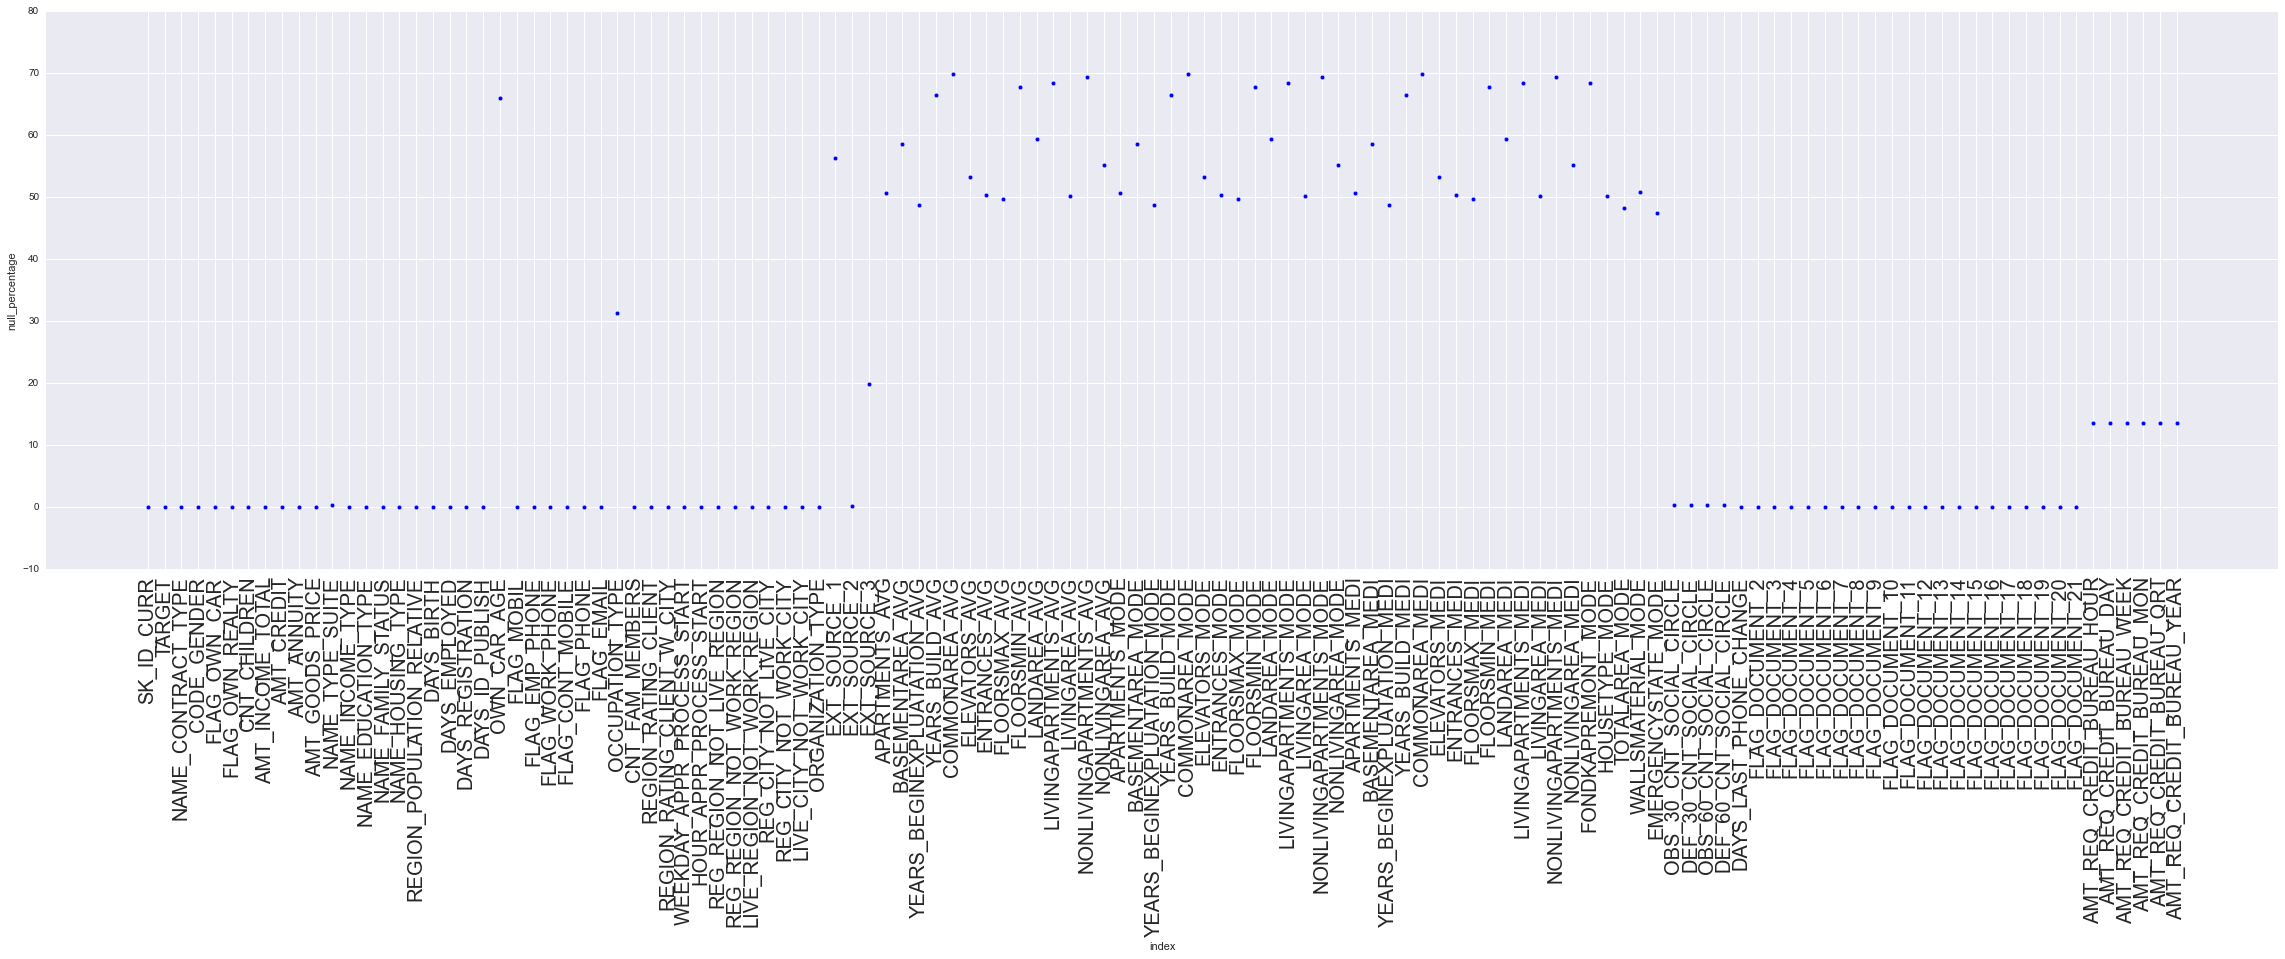

In [355]:
## Plotting scatter plot to analyze where missing values are more than 40
plt.figure(figsize=[40,10])
sns.scatterplot(data=null_set,x='index',y='null_percentage')
plt.xticks(rotation=90,fontsize=20)
plt.show()

### We have lots of columns with more than 40% missing values

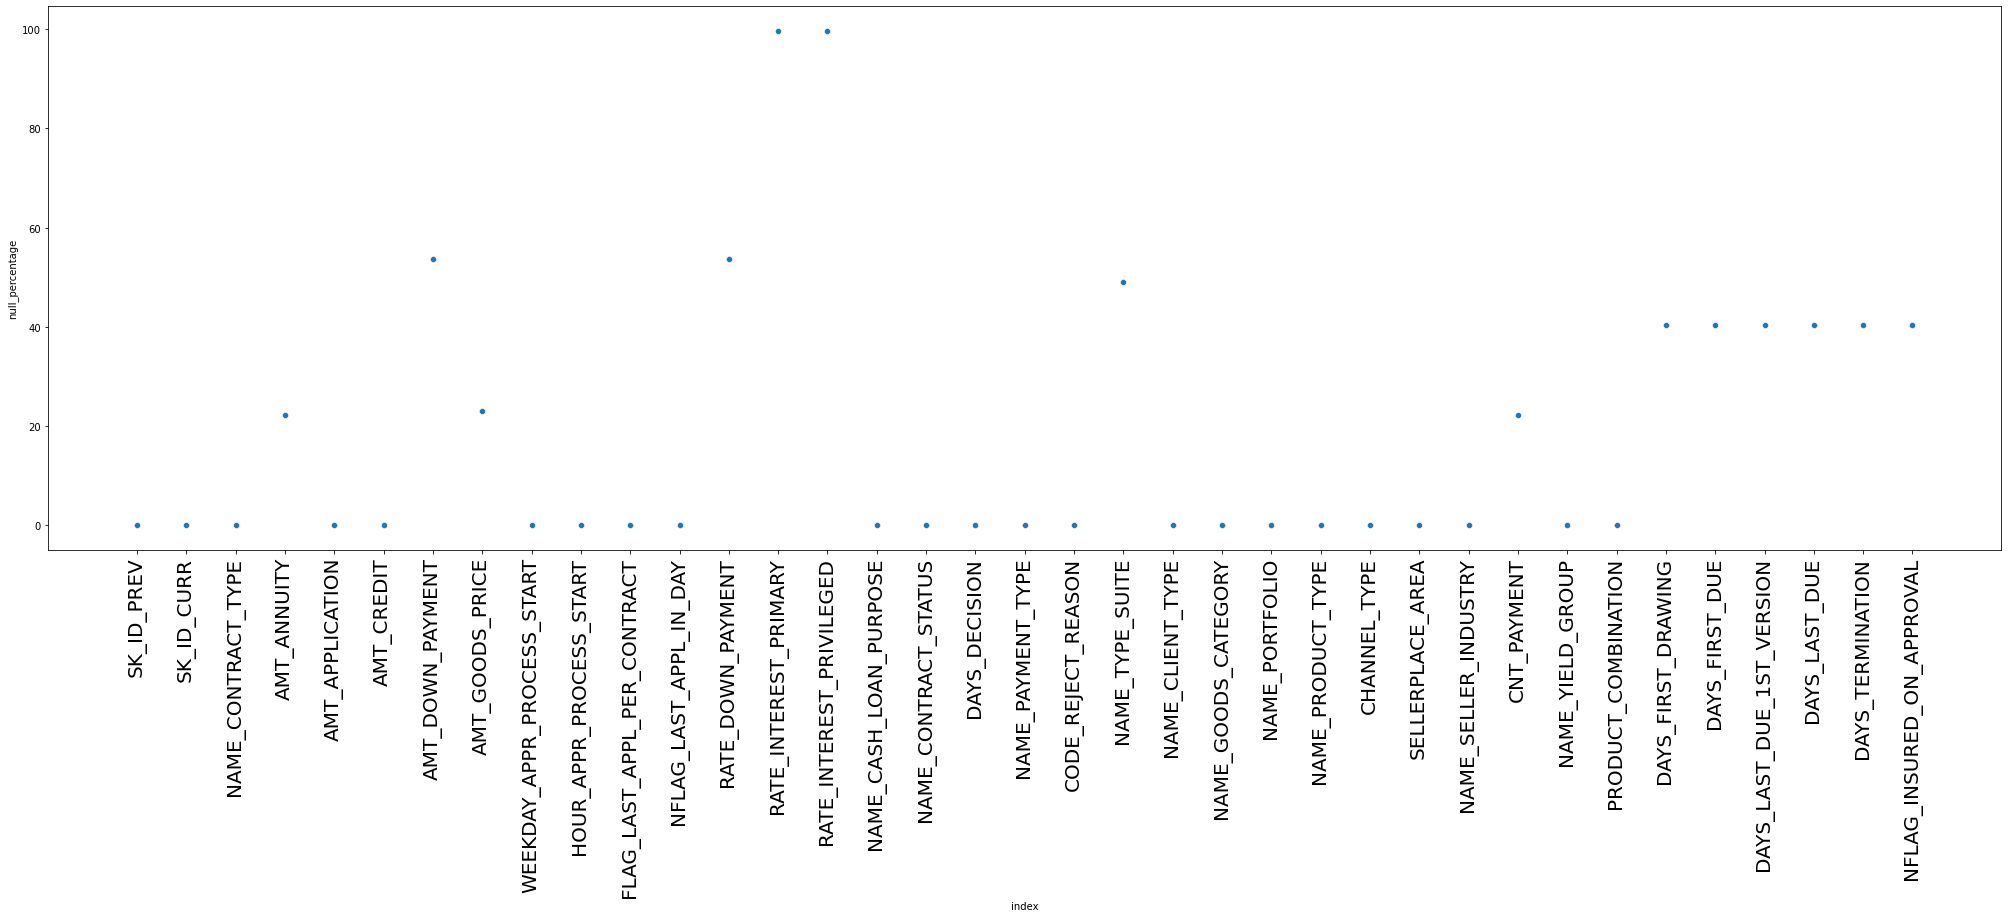

In [60]:
## Plotting scatter plot to analyze where missing values are more than 40%

plt.figure(figsize=[35,10])
sns.scatterplot(data=null_set2,x='index',y='null_percentage')
plt.xticks(rotation=90,fontsize=20)
plt.show()

In [61]:
# lets create a dataframe with all columns having more than 40 % null values
null_set_40=pd.DataFrame(null_set[null_set['null_percentage']>40])
null_set_40

index  null_percentage
21                   OWN_CAR_AGE        65.990810
41                  EXT_SOURCE_1        56.381073
44                APARTMENTS_AVG        50.749729
45              BASEMENTAREA_AVG        58.515956
46   YEARS_BEGINEXPLUATATION_AVG        48.781019
47               YEARS_BUILD_AVG        66.497784
48                COMMONAREA_AVG        69.872297
49                 ELEVATORS_AVG        53.295980
50                 ENTRANCES_AVG        50.348768
51                 FLOORSMAX_AVG        49.760822
52                 FLOORSMIN_AVG        67.848630
53                  LANDAREA_AVG        59.376738
54          LIVINGAPARTMENTS_AVG        68.354953
55                LIVINGAREA_AVG        50.193326
56       NONLIVINGAPARTMENTS_AVG        69.432963
57             NONLIVINGAREA_AVG        55.179164
58               APARTMENTS_MODE        50.749729
59             BASEMENTAREA_MODE        58.515956
60  YEARS_BEGINEXPLUATATION_MODE        48.781019
61              YEARS_BUILD_MODE        66.497784
62               COMMONAREA_MODE        69.872297
63                ELEVATORS_MODE        53.295980
64                ENTRANCES_MODE        50.348768
65                FLOORSMAX_MODE        49.760822
66                FLOORSMIN_MODE        67.848630
67                 LANDAREA_MODE        59.376738
68         LIVINGAPARTMENTS_MODE        68.354953
69               LIVINGAREA_MODE        50.193326
70      NONLIVINGAPARTMENTS_MODE        69.432963
71            NONLIVINGAREA_MODE        55.179164
72               APARTMENTS_MEDI        50.749729
73             BASEMENTAREA_MEDI        58.515956
74  YEARS_BEGINEXPLUATATION_MEDI        48.781019
75              YEARS_BUILD_MEDI        66.497784
76               COMMONAREA_MEDI        69.872297
77                ELEVATORS_MEDI        53.295980
78                ENTRANCES_MEDI        50.348768
79                FLOORSMAX_MEDI        49.760822
80                FLOORSMIN_MEDI        67.848630
81                 LANDAREA_MEDI        59.376738
82         LIVINGAPARTMENTS_MEDI        68.354953
83               LIVINGAREA_MEDI        50.193326
84      NONLIVINGAPARTMENTS_MEDI        69.432963
85            NONLIVINGAREA_MEDI        55.179164
86            FONDKAPREMONT_MODE        68.386172
87                HOUSETYPE_MODE        50.176091
88                TOTALAREA_MODE        48.268517
89            WALLSMATERIAL_MODE        50.840783
90           EMERGENCYSTATE_MODE        47.398304

In [62]:
len(null_set_40)

49

#### We see in the application_data we have 49 columns with more than 40% null values

In [63]:
## lets check for previous application data set as well
null_set2_40=pd.DataFrame(null_set2[null_set2['null_percentage']>40])
null_set2_40

index  null_percentage
6            AMT_DOWN_PAYMENT        53.636480
12          RATE_DOWN_PAYMENT        53.636480
13      RATE_INTEREST_PRIMARY        99.643698
14   RATE_INTEREST_PRIVILEGED        99.643698
20            NAME_TYPE_SUITE        49.119754
31         DAYS_FIRST_DRAWING        40.298129
32             DAYS_FIRST_DUE        40.298129
33  DAYS_LAST_DUE_1ST_VERSION        40.298129
34              DAYS_LAST_DUE        40.298129
35           DAYS_TERMINATION        40.298129
36  NFLAG_INSURED_ON_APPROVAL        40.298129

In [64]:
len(null_set2_40)

11

#### And in previous_application dataset we have 11 columns with more than 40% null values

## Lets analyze and remove the unneccessary columns 

In [72]:
## Lets create a list of all columns that needs to be deleted.
list_to_drop_set1=null_set_40['index'].to_list()
list_to_drop_set1

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [73]:
# get the list from previous application dataset as well
list_to_drop_set2=null_set2_40['index'].to_list()
list_to_drop_set2

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

### Lets analyze one dataset at a time 
- Application data

As our target variable is TARGET. We can cor-relate the columns we think is not neccessary with our Target variable using the graph.

- In our dataset we see multiple columns of flags like - mobile phone, work phone etc, email, Family members and Region rating
- We see columns of external source that might not be neccessary as well
- And few columns of flag around document which we could analyze

In [81]:
## Multivariate analysis using Heatmap
flag_data=app_data.loc[:, 'FLAG_MOBIL':'FLAG_EMAIL']
flag_data['TARGET']=app_data['TARGET']
flag_data.head()

FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  TARGET
0           1               1                0                 1           1           0       1
1           1               1                0                 1           1           0       0
2           1               1                1                 1           1           0       0
3           1               1                0                 1           0           0       0
4           1               1                0                 1           0           0       0

In [90]:
flag_data_corr=flag_data.corr()
flag_data_corr

FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL    TARGET
FLAG_MOBIL          1.000000       -0.000845         0.000900         -0.000078    0.001128    0.000442  0.000534
FLAG_EMP_PHONE     -0.000845        1.000000         0.233801         -0.012819   -0.016131    0.062542  0.045982
FLAG_WORK_PHONE     0.000900        0.233801         1.000000          0.021580    0.293105   -0.011520  0.028524
FLAG_CONT_MOBILE   -0.000078       -0.012819         0.021580          1.000000    0.006257   -0.005356  0.000370
FLAG_PHONE          0.001128       -0.016131         0.293105          0.006257    1.000000    0.014657 -0.023806
FLAG_EMAIL          0.000442        0.062542        -0.011520         -0.005356    0.014657    1.000000 -0.001758
TARGET              0.000534        0.045982         0.028524          0.000370   -0.023806   -0.001758  1.000000

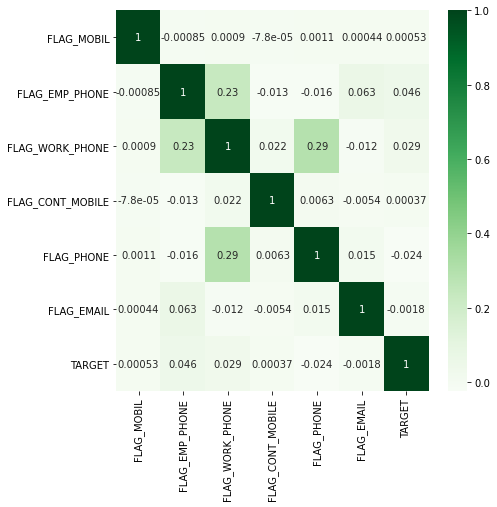

In [89]:
plt.figure(figsize=[7,7])
sns.heatmap(flag_data_corr,annot=True,cmap='Greens')
plt.show()

#### From the above heatmap we could see negative values as well as values with  very small numbers when compared with our target variable. 
(0.000534	0.045982	0.028524	0.000370	-0.023806	-0.001758) not even close to 1 % hence we can conclude that these columns are not cor-related with our target variable and is safe to drop.

- Adding these columns to the drop list

In [91]:
## set 1
list_to_drop_set1=list_to_drop_set1 + ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

In [92]:
len(list_to_drop_set1)

55

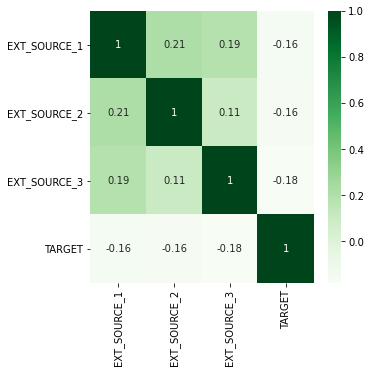

In [95]:
## checking for external source column using the same multivariate approach
plt.figure(figsize=[5,5])
ext_source=app_data[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','TARGET']]
ext_source_corr=ext_source.corr()
sns.heatmap(ext_source_corr,annot=True,cmap='Greens')
plt.show()

#### We could see their is no linear relationship between the external source and our target variable. All the values are showing negative. 
(-0.155317	-0.160472	-0.178919) , hence we are safe to drop these columns as well from our dataset.

In [97]:
## adding it to the drop list - EXT_SOURCE_1 already part of list so adding other two
list_to_drop_set1=list_to_drop_set1 + ['EXT_SOURCE_2','EXT_SOURCE_3']

In [98]:
len(list_to_drop_set1)

57

In [100]:
### lets check for flag documents now
flag_doc=app_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21']
flag_doc['TARGET']=app_data['TARGET']
flag_doc.head()

FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  TARGET
0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       1
1                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       0
2                0                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       0
3                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       0
4                0                0                0                0                0                0                1                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       0

In [101]:
flag_doc_corr=flag_doc.corr()
flag_doc_corr

FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21    TARGET
FLAG_DOCUMENT_2          1.000000        -0.010174        -0.000059        -0.000805        -0.002020        -0.000090        -0.001935        -0.000407         -0.000031         -0.000407         -0.000017         -0.000387         -0.000353         -0.000226         -0.000651         -0.000106         -0.000589         -0.000159         -0.000146         -0.000119  0.005417
FLAG_DOCUMENT_3         -0.010174         1.000000        -0.014110        -0.193850        -0.486238        -0.021677        -0.465730        -0.097859         -0.007466         -0.093242         -0.001180         -0.020274          0.002099          0.000592          0.033418          0.002536          0.007976          0.009423          0.007396         -0.025510  0.044346
FLAG_DOCUMENT_4         -0.000059        -0.014110         1.000000        -0.001117        -0.002802        -0.000125        -0.002684        -0.000564         -0.000043         -0.000565         -0.000023         -0.000536         -0.000489         -0.000314         -0.000903         -0.000147         -0.000816         -0.000220         -0.000203         -0.000165 -0.002672
FLAG_DOCUMENT_5         -0.000805        -0.193850        -0.001117         1.000000        -0.038495        -0.001716        -0.036871        -0.007747         -0.000591         -0.007764         -0.000316         -0.007368         -0.006723         -0.004311         -0.012137         -0.002023         -0.010622         -0.003023         -0.002791          0.000645 -0.000316
FLAG_DOCUMENT_6         -0.002020        -0.486238        -0.002802        -0.038495         1.000000        -0.004305        -0.092485        -0.019433         -0.001483         -0.018738         -0.000792         -0.017514         -0.014318         -0.009824         -0.026603         -0.004372         -0.023915         -0.004759         -0.005981         -0.005688 -0.028602
FLAG_DOCUMENT_7         -0.000090        -0.021677        -0.000125        -0.001716        -0.004305         1.000000        -0.004123        -0.000866         -0.000066         -0.000868         -0.000035         -0.000824         -0.000752         -0.000482         -0.001387         -0.000226         -0.001254         -0.000338         -0.000312         -0.000254 -0.001520
FLAG_DOCUMENT_8         -0.001935        -0.465730        -0.002684        -0.036871        -0.092485        -0.004123         1.000000        -0.018613         -0.001420         -0.017509          0.003905          0.077019          0.030228          0.023517          0.012783          0.005338          0.007756          0.000053          0.003859         -0.001548 -0.008040
FLAG_DOCUMENT_9         -0.000407        -0.097859        -0.000564        -0.007747        -0.019433        -0.000866        -0.018613         1.000000         -0.000298         -0.003919         -0.000159          0.000684          0.001430          0.002329          0.008480          0.008570          0.001895         -0.001526         -0.001409         -0.001145 -0.004352
FLAG_DOCUMENT_10        -0.000031        -0.007466        -0.000043        -0.000591        -0.001483        -0.000066        -0.001420        -0.000298          1.000000         -0.000299         -0.000012         -0.000284         -0.000259         -0.000166         -0.000478         -0.000078         -0.000432         -0.000116         -0.000107         -0.000087 -0.001414
FLAG_DOCUMENT_11        -0.000407        -0.093242        -0.000565        -0.007764        -0.018738        -0.000868        -0.017509        -0.003919         -0.000299          1.000000         -0.000160         -0.003727    

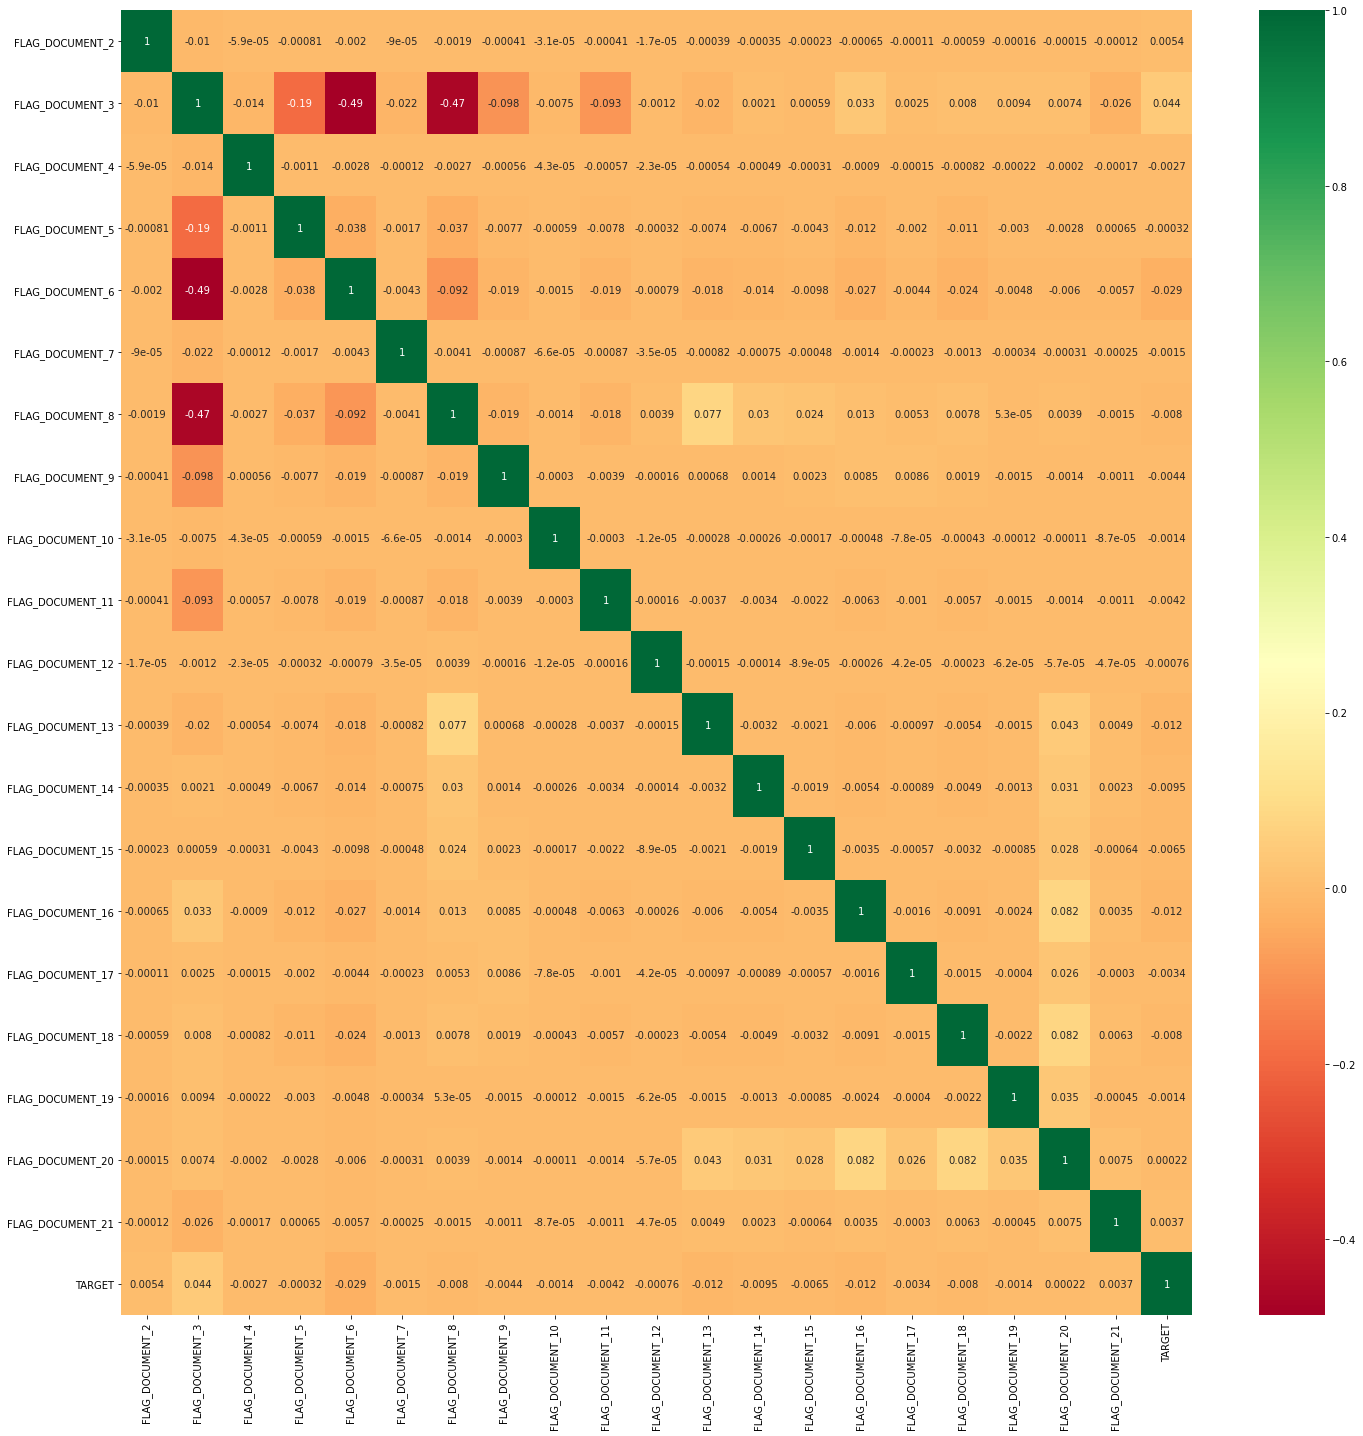

In [104]:
plt.figure(figsize=[24,24])
sns.heatmap(flag_doc_corr,annot=True,cmap='RdYlGn')
plt.show()

#### from the above chart we could not see any correlation as well with our target variable , hence we are safe to drop them as well.
Adding them to the drop list

In [106]:
flag_doc.columns

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'TARGET'], dtype='object')

In [109]:
len(flag_doc.columns)

21

In [111]:
doc_list=flag_doc.columns.to_list()

In [115]:
doc_list

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [116]:
list_to_drop_set1=list_to_drop_set1+doc_list

In [117]:
len(list_to_drop_set1)

77

So we have 77 columns to be deleted from Application dataset

In [118]:
## deleting unneccessary columns and creating a new dataframe and storing the final data in it
application_data=app_data.drop(labels=list_to_drop_set1,axis=1)

In [119]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Now we have 45 columns in our final dataset application data without any unneccessary missing values and unrelated data

- Previous Application

In [121]:
### lets start with second data set previous application and perform the same steps
## We already have the list with more than 40% missing values
list_to_drop_set2


['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [122]:
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [123]:
### Adding some more columns which is irrelevant to the target variable and would not impatct the outcome are: 
list_to_drop_set2= list_to_drop_set2 + ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [126]:
### creating final dataframe with all unneccessary columns dropped
previous_application = prev_app.drop(labels=list_to_drop_set2,axis=1)

In [127]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

Now we have 22 columns in our final dataset of previous application without any unneccessary missing values and unrelated data

### Now we can check for the missing values row wise

In [130]:
# missing rows in application data
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

#### application data columns with missing values
- OBS_30_CNT_SOCIAL_CIRCLE        1021
- DEF_30_CNT_SOCIAL_CIRCLE        1021
- OBS_60_CNT_SOCIAL_CIRCLE        1021
- DEF_60_CNT_SOCIAL_CIRCLE        1021
- AMT_REQ_CREDIT_BUREAU_HOUR     41519
- AMT_REQ_CREDIT_BUREAU_DAY      41519
- AMT_REQ_CREDIT_BUREAU_WEEK     41519
- AMT_REQ_CREDIT_BUREAU_MON      41519
- AMT_REQ_CREDIT_BUREAU_QRT      41519
- AMT_REQ_CREDIT_BUREAU_YEAR     41519
- OCCUPATION_TYPE                96391
- CNT_FAM_MEMBERS                    2
- AMT_ANNUITY                       12
- AMT_GOODS_PRICE                  278
- NAME_TYPE_SUITE                 1292

In [131]:
## missing rows in previous application
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT               372230
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION          346
dtype: int64

#### previous application data columns with missing values
- AMT_ANNUITY               372235
- AMT_CREDIT                     1
- AMT_GOODS_PRICE           385515
- CNT_PAYMENT               372230
- PRODUCT_COMBINATION          346

In [143]:
### Dealing with application data first

## creating a dataframe with all column having null values so that we can apply some inbuilt function in one go using loop 
null_values= pd.DataFrame(application_data.isnull().sum()).reset_index()

In [157]:
null_values.columns=['Columns','Count']
null_values

Columns  Count
9                  AMT_ANNUITY     12
10             AMT_GOODS_PRICE    278
11             NAME_TYPE_SUITE   1292
21             OCCUPATION_TYPE  96391
22             CNT_FAM_MEMBERS      2
34    OBS_30_CNT_SOCIAL_CIRCLE   1021
35    DEF_30_CNT_SOCIAL_CIRCLE   1021
36    OBS_60_CNT_SOCIAL_CIRCLE   1021
37    DEF_60_CNT_SOCIAL_CIRCLE   1021
38      DAYS_LAST_PHONE_CHANGE      1
39  AMT_REQ_CREDIT_BUREAU_HOUR  41519
40   AMT_REQ_CREDIT_BUREAU_DAY  41519
41  AMT_REQ_CREDIT_BUREAU_WEEK  41519
42   AMT_REQ_CREDIT_BUREAU_MON  41519
43   AMT_REQ_CREDIT_BUREAU_QRT  41519
44  AMT_REQ_CREDIT_BUREAU_YEAR  41519

In [146]:
null_values=null_values[null_values['Count']>0]
null_values['Columns']

In [154]:
# got statistical details regarding numeric and categotrical columns. 
for column in null_values.Columns:
    print(application_data[column].describe())

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object
count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64
count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%     

In [155]:
#  unique values of numeric and categotrical columns and we could see we have NAN values
for column in null_values.Columns:
    print(application_data[column].unique())

[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
[ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14. 12. 20. 15. 16. 11.]
[  2.   1.   0.   4.   8.  10.  nan   7.   3.   6.   5.  12.   9.  13.
  11.  14.  22.  16.  15.  17.  20.  25.  19.  18.  21.  24.  23.  28.
  26.  29.  27.  47. 348.  30.]
[ 2.  0.  1. nan  3.  4.  5.  6.  7. 34.  8.]
[  2.   1.   0.   4.   8.  10.  nan   7.   3.   6.   5.  12.   9.  13.
  11.  14.  21.  15.  22.  16.  20.  25.  17.  19.  18.  24.  23.  28.
  29.  27.  47. 344.  30.  26.]
[ 2.  0.  1. nan  3

-  ####  From the above data we could replace the NAN values of categorical columns with the mode value or the top values shown by describe function

- #### And for Numeric columns we could see that their is difference between the mean and median values. We could also see that the difference between 75% and max value is very huge that signifies, we have lot of outlier that might have impacted the mean value hence we could replace the null values with Median instead of mean value.

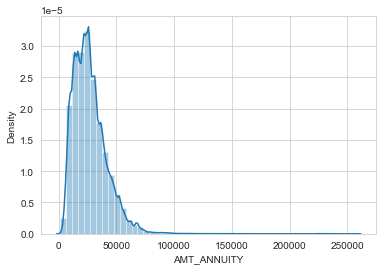

In [160]:
## before imputing the values lets see the result on plot chart as well.
sns.set_style('whitegrid')
sns.distplot(application_data['AMT_ANNUITY'])
plt.show()

In [167]:
# to get more granular approach we could see the difference between the 99 percentile and 100 percentile
application_data.AMT_ANNUITY.quantile([0.5,0.75,0.9,0.99,1])

0.50     24903.0
0.75     34596.0
0.90     45954.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

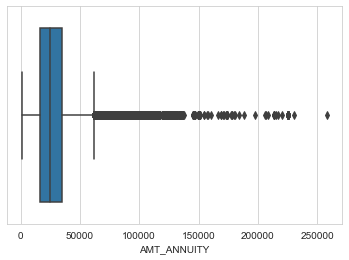

In [168]:
### We could see outliers present, lets plot it on boxplot
sns.set_style('whitegrid')
sns.boxplot(application_data['AMT_ANNUITY'])
plt.show()

In [169]:
## Hence we could conclude it contains outlier and we could go with median instead of mean
application_data['AMT_ANNUITY'].fillna(application_data['AMT_ANNUITY'].median(),inplace=True)

In [170]:
# no null values now
application_data['AMT_ANNUITY'].isnull().sum()

0

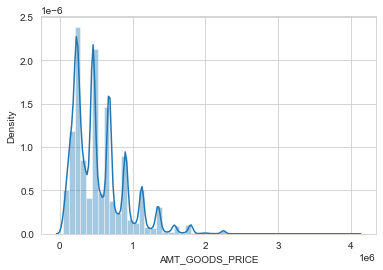

In [172]:
sns.set_style('whitegrid')
sns.distplot(application_data['AMT_GOODS_PRICE'])
plt.show()

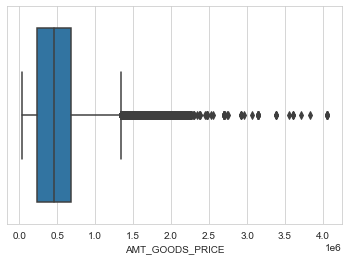

In [174]:
sns.set_style('whitegrid')
sns.boxplot(application_data['AMT_GOODS_PRICE'])
plt.show()

In [173]:
application_data.AMT_GOODS_PRICE.quantile([0.5,0.75,0.9,0.99,1])

0.50     450000.0
0.75     679500.0
0.90    1093500.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [175]:
## we see there are some outlier, to be on safe side, lets replace it with median as well
application_data['AMT_GOODS_PRICE'].fillna(application_data['AMT_GOODS_PRICE'].median(),inplace=True)

In [176]:
application_data['AMT_GOODS_PRICE'].isnull().sum()

0

### lets perform the same steps on bulk basis for all numeric variables

In [177]:
numeric_columns = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','CNT_FAM_MEMBERS',
                   'DAYS_LAST_PHONE_CHANGE','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                  'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

for column in numeric_columns:
    application_data[column].fillna(application_data[column].median(), inplace = True)

In [178]:
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

### Imputing Categorical Variable

In [179]:
application_data['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [180]:
application_data['OCCUPATION_TYPE'].value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [181]:
#### Replacing the null values with mode in categorical variable
application_data['NAME_TYPE_SUITE'].fillna(application_data['NAME_TYPE_SUITE'].mode()[0],inplace=True)


In [182]:
### for OCCUPATION_TYPE we see count of missing value is very large hence creating a new category(UNKNOWN) is better than replacing with mode
application_data['OCCUPATION_TYPE'].fillna('UNKNOWN', inplace =True) 

In [185]:
### as we had 31% misisng values in OCCUPATION_TYPE column, the most frequent type is UNKNOWN now

application_data['OCCUPATION_TYPE'].value_counts(normalize=True)

UNKNOWN                  0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

#### We don't have any missing columns or rows in our first dataset, lets perform the same with second dataset.

In [186]:
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT               372230
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION          346
dtype: int64

In [187]:
## we see the same columns have null values as well similar to application data, hence replacing it with the median value.
previous_application['AMT_ANNUITY'].fillna(previous_application['AMT_ANNUITY'].median(),inplace=True)
previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].median(),inplace=True)

In [188]:
### CNT_PAYMENT - Term of previous credit at application of the previous application 
## Could be null in case if the the customer is new or the the last application was not processed hence we should replace it with 0
previous_application.loc[previous_application['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()


Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

#### We could see that the most of the null values are because the application was cancelled, refused or unused.
Hence replacing it with 0

In [190]:
previous_application['CNT_PAYMENT'].fillna(0,inplace=True)

In [191]:
previous_application.isnull().sum()

SK_ID_PREV                  0
SK_ID_CURR                  0
NAME_CONTRACT_TYPE          0
AMT_ANNUITY                 0
AMT_APPLICATION             0
AMT_CREDIT                  1
AMT_GOODS_PRICE             0
NAME_CASH_LOAN_PURPOSE      0
NAME_CONTRACT_STATUS        0
DAYS_DECISION               0
NAME_PAYMENT_TYPE           0
CODE_REJECT_REASON          0
NAME_CLIENT_TYPE            0
NAME_GOODS_CATEGORY         0
NAME_PORTFOLIO              0
NAME_PRODUCT_TYPE           0
CHANNEL_TYPE                0
SELLERPLACE_AREA            0
NAME_SELLER_INDUSTRY        0
CNT_PAYMENT                 0
NAME_YIELD_GROUP            0
PRODUCT_COMBINATION       346
dtype: int64

In [193]:
previous_application['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [194]:
previous_application.loc[previous_application['PRODUCT_COMBINATION'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled    315
Refused      31
Name: NAME_CONTRACT_STATUS, dtype: int64

#### From above analysis we could see the null values for Product_combination is only when the application is cancelled or refused. Hence it make sense of the null values on that location. We would not make any changes to this null values.

#### Data Standardization
- Application Data

In [195]:
application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [197]:
# making XNA values in 4 rows to the mode of the column
application_data.loc[application_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [198]:
application_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [196]:
application_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [204]:
## as the XNA has large number of value, it is better to create a new category UNKNOWN to keep it.
application_data['ORGANIZATION_TYPE']=application_data['ORGANIZATION_TYPE'].replace("XNA","Unknown")

Looking at the column which have dates and days
- DAYS_BIRTH
- DAYS_DECISION
- DAYS_EMPLOYED
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH 

have negative values which does not make sense ,making the value as positive as days cannot be negative

In [209]:
days_columns=['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for day in days_columns:
    application_data[day]=abs(application_data[day])

##### Binning the Numeric columns to Categorical columns

In [210]:
# creating bins for income amount
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [211]:
# creating bins for credit amount
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=slots)

In [214]:
application_data.AMT_INCOME_RANGE.value_counts(normalize=True) * 100

125000-150000       15.573427
100000-125000       14.211199
200000-225000       13.266842
75000,100000        12.944578
150000-175000       11.272117
175000-200000        9.639980
50000-75000          6.300588
250000-275000        4.140665
225000-250000        2.386906
300000-325000        2.195694
350000-375000        1.475394
25000-50000          1.468891
275000-300000        1.400275
425000-450000        1.012322
500000 and above     0.878668
325000-350000        0.690057
400000-425000        0.588922
375000-400000        0.411367
475000-500000        0.101460
450000-475000        0.040649
0-25000              0.000000
Name: AMT_INCOME_RANGE, dtype: float64

#### We can see that around 50% of the applicants have income in range between 100K to 200K and around 3% has income more than 300K

In [213]:
application_data.AMT_CREDIT_RANGE.value_counts(normalize=True) * 100

900000 and above    19.157689
250000-300000       10.327761
200000-250000        7.496968
500000-550000        7.374696
400000-450000        5.931170
0-150000             5.905155
150000-200000        5.848571
300000-350000        5.269730
650000-700000        4.894459
450000-500000        4.487319
750000-800000        4.025872
800000-850000        3.758890
550000-600000        3.757264
850000-900000        3.327686
350000-400000        3.295167
600000-650000        2.926074
700000-750000        2.215531
Name: AMT_CREDIT_RANGE, dtype: float64

#### We can see that 19% of the applicants have applied for more than 900K of loan amount and around 23% of the applicants applied loan below 300K

In [215]:
# Creating bins for Age
application_data['AGE'] = application_data['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

application_data['AGE_GROUP']=pd.cut(application_data['AGE'],bins=bins,labels=slots)

In [216]:
application_data.AGE_GROUP.value_counts(normalize=True) * 100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

#### We could see the 32% of the applicants are above 50 years of age

In [217]:
# Creating bins for employment time
application_data['YEARS_EMPLOYED']= application_data['DAYS_EMPLOYED']//365
bins=[0,5,10,20,30,40,50,60,150]
slots=['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60-above']
application_data['YEARS_OF_EMPLOYMENT']=pd.cut(application_data['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [218]:
application_data.YEARS_OF_EMPLOYMENT.value_counts(normalize=True) * 100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60-above     0.000000
Name: YEARS_OF_EMPLOYMENT, dtype: float64

#### 50% of the applicants have 0-5 years of experience and 84% of the applicants have less than 20 years of experience

In [220]:
application_data.nunique().sort_values()

REG_CITY_NOT_WORK_CITY              2
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_CITY_NOT_WORK_CITY             2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
YEARS_OF_EMPLOYMENT                 6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CRED

In [234]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [223]:
## as all the other variables are already in float64 or int64, lets convert the remaining to categorical category
category_col = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in category_col:
    application_data[col] =pd.Categorical(application_data[col])

- Previous Application

In [224]:
## days_decision column
previous_application['DAYS_DECISION']=abs(previous_application['DAYS_DECISION']//365)

In [230]:
## binning days_decision
previous_application['DAYS_DECISION'].value_counts(normalize=True)*100

0    34.240223
1    23.117636
2    12.875536
3     7.894557
4     6.132508
6     5.810273
7     5.049712
5     4.850337
8     0.029218
Name: DAYS_DECISION, dtype: float64

#### For 34% of the applications the decision was made within a year. And for only 20% of the application the decision took more than 3 years

In [232]:
# converting the variables to categorical
prev_catgory_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                    'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION']
for col in prev_catgory_col:
    previous_application[col]=pd.Categorical(previous_application[col])

In [233]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1670214 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  category
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

### Handling Outliers
- Application data

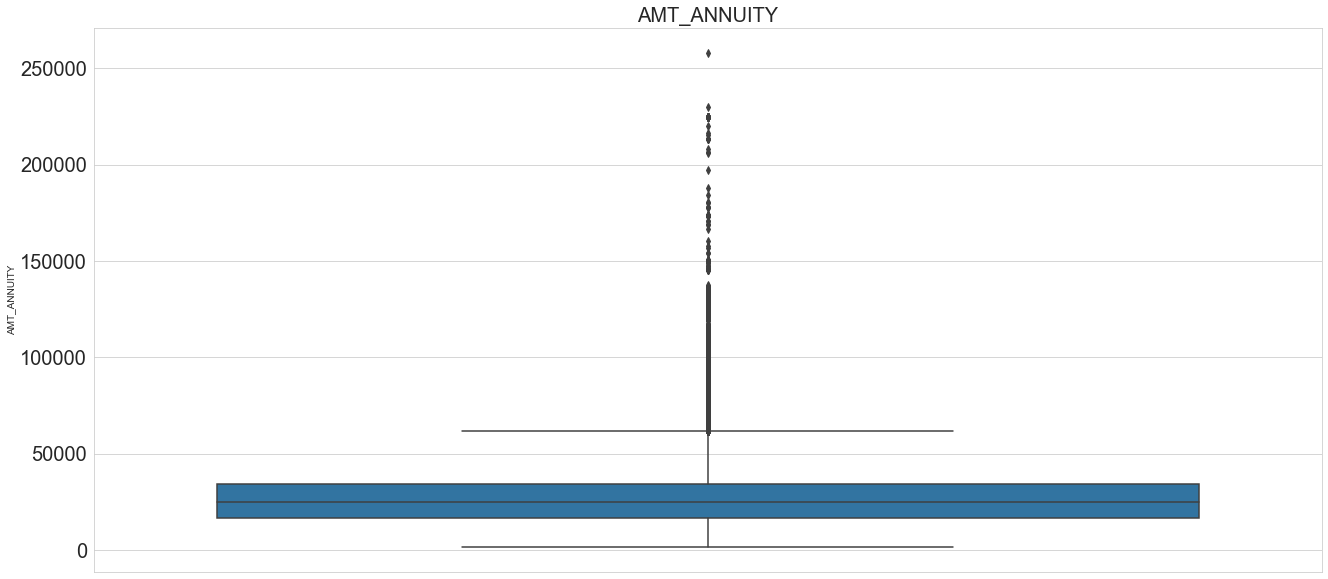

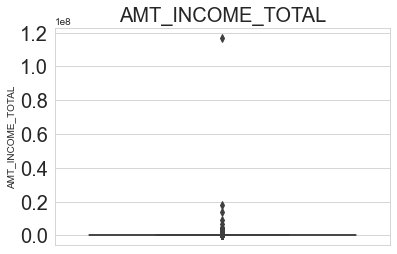

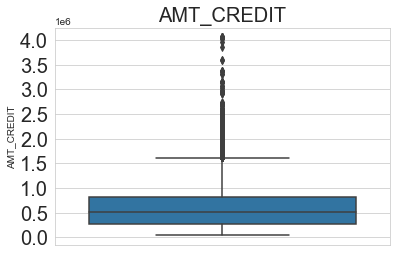

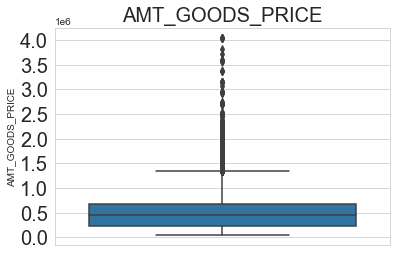

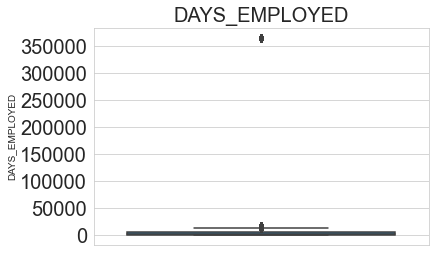

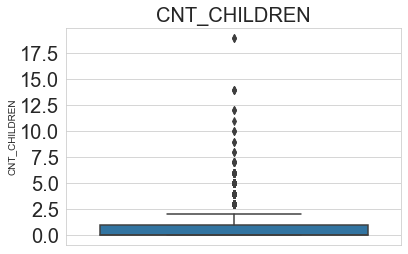

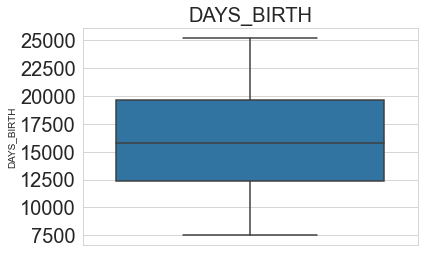

In [296]:
plt.figure(figsize=[22,10])
outliers_data=['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','DAYS_BIRTH']
for data in outliers_data:
    sns.boxplot(y=application_data[data])
    plt.title(data,fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

In [258]:
application_data[['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','DAYS_BIRTH']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_GOODS_PRICE  DAYS_EMPLOYED   CNT_CHILDREN     DAYS_BIRTH
count  307511.000000      3.075110e+05  3.075110e+05     3.075110e+05  307511.000000  307511.000000  307511.000000
mean    27108.487841      1.687979e+05  5.990260e+05     5.383163e+05   67724.742149       0.417052   16036.995067
std     14493.461065      2.371231e+05  4.024908e+05     3.692890e+05  139443.751806       0.722121    4363.988632
min      1615.500000      2.565000e+04  4.500000e+04     4.050000e+04       0.000000       0.000000    7489.000000
25%     16524.000000      1.125000e+05  2.700000e+05     2.385000e+05     933.000000       0.000000   12413.000000
50%     24903.000000      1.471500e+05  5.135310e+05     4.500000e+05    2219.000000       0.000000   15750.000000
75%     34596.000000      2.025000e+05  8.086500e+05     6.795000e+05    5707.000000       1.000000   19682.000000
max    258025.500000      1.170000e+08  4.050000e+06     4.050000e+06  365243.000000      19.000000   25229.000000

#### From the above box plot we can conclude below points:
- DAYS_BIRTH column do not have any outlier
- AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some outlier
- AMT_INCOME_TOTAL has a huge outlier having extreme high income
- DAYS_EMPLOYED also has a huge outlier above 350000 days that means around 1000 years of experience that seems incorrect

- Previous Application

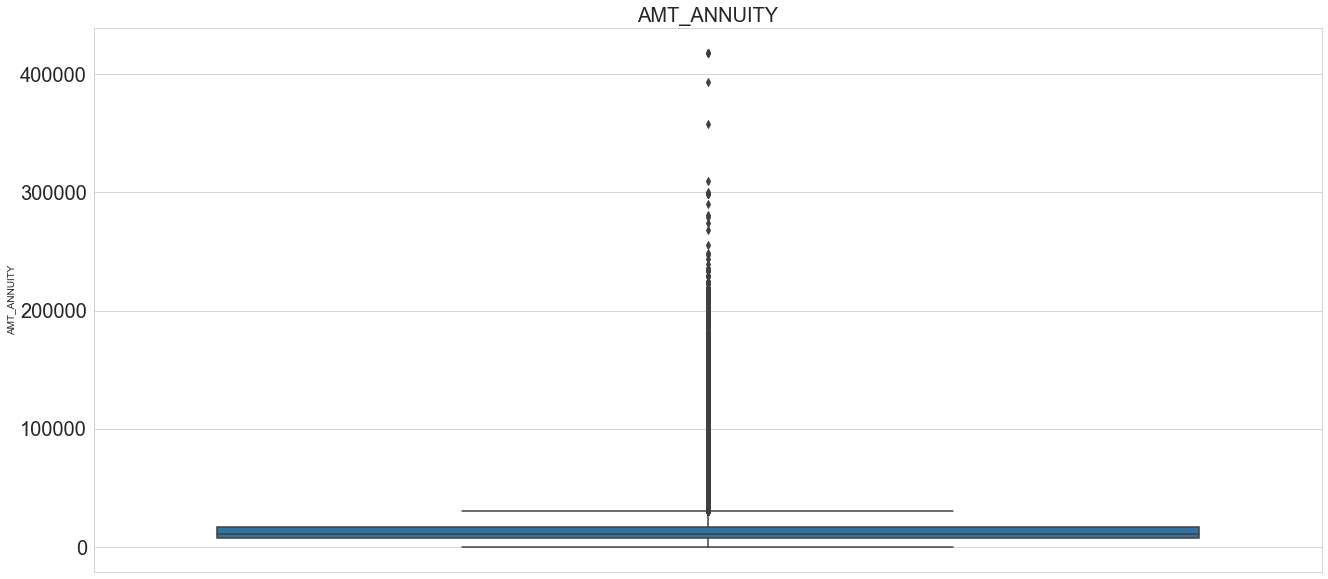

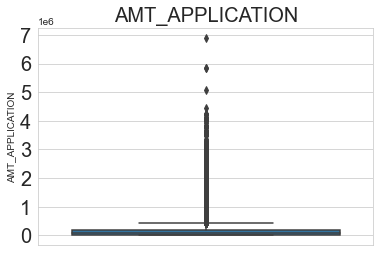

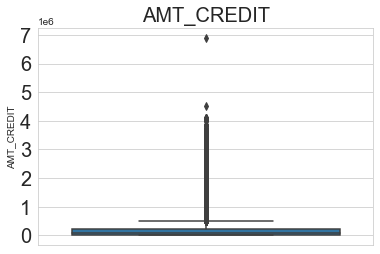

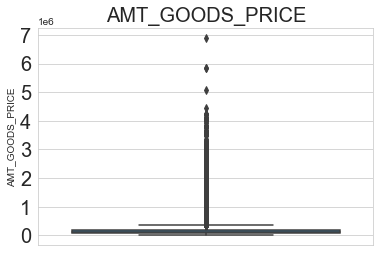

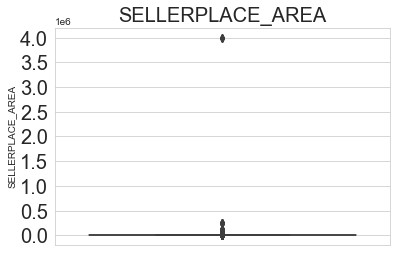

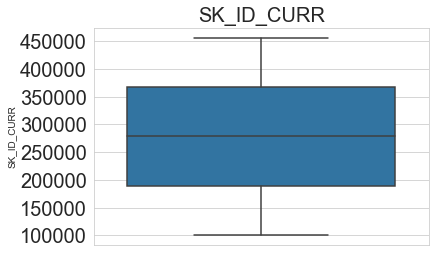

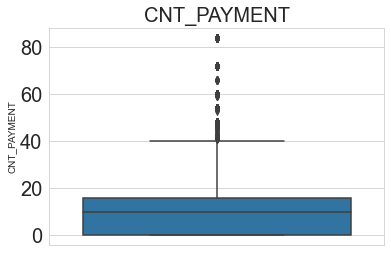

In [263]:
plt.figure(figsize=[22,10])
outlier_data_1=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA','SK_ID_CURR','CNT_PAYMENT']
for data in outlier_data_1:
    sns.boxplot(y=previous_application[data])
    plt.title(data,fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

In [264]:
previous_application[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA','SK_ID_CURR','CNT_PAYMENT']].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  SELLERPLACE_AREA    SK_ID_CURR   CNT_PAYMENT
count  1.670214e+06     1.670214e+06  1.670213e+06     1.670214e+06      1.670214e+06  1.670214e+06  1.670214e+06
mean   1.490651e+04     1.752339e+05  1.961140e+05     2.011815e+05      3.139511e+02  2.783572e+05  1.247621e+01
std    1.317751e+04     2.927798e+05  3.185746e+05     2.808629e+05      7.127443e+03  1.028148e+05  1.447588e+01
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00     -1.000000e+00  1.000010e+05  0.000000e+00
25%    7.547096e+03     1.872000e+04  2.416050e+04     6.750000e+04     -1.000000e+00  1.893290e+05  0.000000e+00
50%    1.125000e+04     7.104600e+04  8.054100e+04     1.123200e+05      3.000000e+00  2.787145e+05  1.000000e+01
75%    1.682403e+04     1.803600e+05  2.164185e+05     1.804050e+05      8.200000e+01  3.675140e+05  1.600000e+01
max    4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06      4.000000e+06  4.562550e+05  8.400000e+01

#### Analysis from above plotting
- SK_ID_CURR do not have any outlier
- SELLER_PLACE_AREA,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE has a huge outlier
- CNT_PAYMENT has some outlier

### Step 3: Data Analysis
- #### Univariate Analysis 
    - Categorical Unordered Analysis 
    - Categorical Ordered Analysis 
    - Statistics on Numerical Variable
    - Numerical Variable Analysis 
    
- #### Bivariate and MultiVariate Analysis
    - Numeric-Numeric Analysis
    - Numeric-Categorical Analysis
    - Correlation versus Causation 
    - Categorical-Categorical Analysis

- Univariate Analysis

#### Checking for data imbalance and its ratio

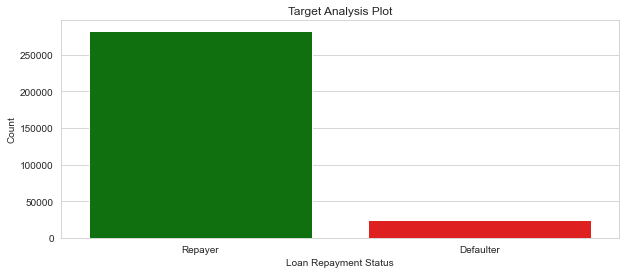

In [266]:
### If we look at our target variable , we can divide our dataset into two dataframes 
### and do the analysis based on either a Defaulter ot Repayer, lets first plot them and see the chart
###Categorical Ordered
Target_data = application_data["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Target_data,palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count")
plt.title("Target Analysis Plot")
plt.show()

In [293]:
count_repayer = Target_data.iloc[0]["TARGET"]
count_defaulter = Target_data.iloc[1]["TARGET"]
count_repayer_perc = round(count_repayer / (count_repayer + count_defaulter) * 100, 2)
count_defaulter_perc = round(count_defaulter / (count_repayer + count_defaulter) * 100, 2)

print('Repayer - '+ str(count_repayer_perc) +'%  and Defaulter - ' + str(count_defaulter_perc) + '%')
print('Ratios of imbalance is %.2f : 1 '%(count_repayer/count_defaulter))

Repayer - 91.93%  and Defaulter - 8.07%
Ratios of imbalance is 11.39 : 1 


#### We could see that the number of Repayers are more as compare to Defaulter

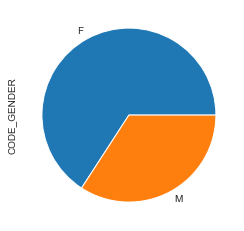

In [281]:
# Lets analyze few more univariate variables
# Categorical Unordered
application_data['CODE_GENDER'].value_counts().plot.pie()
plt.show()

Applicants are more Female as compare to Male

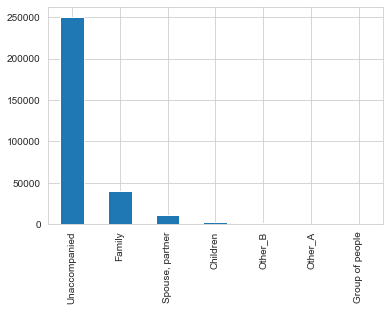

In [283]:
## Categorical Unordered
application_data['NAME_TYPE_SUITE'].value_counts().plot.bar()
plt.show()

Mostly applicants were alone during filling the application and some were with there families

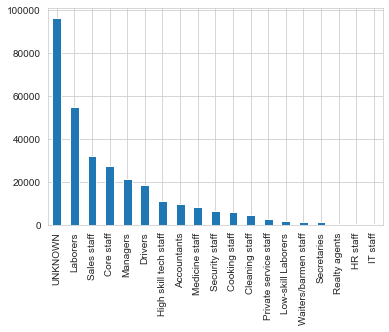

In [284]:
# # Categorical Unordered
application_data['OCCUPATION_TYPE'].value_counts().plot.bar()
plt.show()

Most of the applicants we are not aware of the occupation type but the second largest is Laborers and least is IT staff

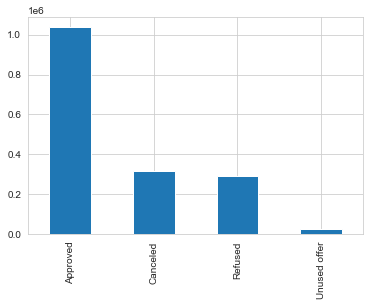

In [285]:
# # Categorical Unordered
previous_application['NAME_CONTRACT_STATUS'].value_counts().plot.bar()
plt.show()

Most of the application were Approved

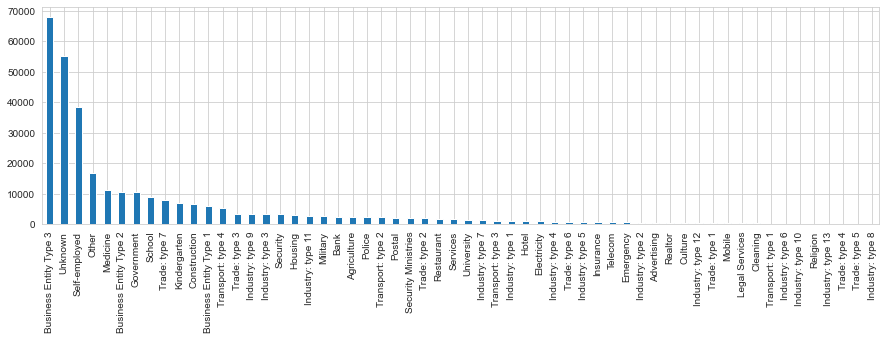

In [288]:
# # Categorical Unordered
plt.figure(figsize=[15,4])
application_data['ORGANIZATION_TYPE'].value_counts().plot.bar()
plt.show()

Mostly applicants belongs to Business Entity Type 3 Organization and Self Employed

- Bivariate and Multivariate Analysis

In [460]:
#### Defining a function so that we can analyse different columns with respect to target variable at once:

def bivariate_analysis(tar_col,horizontal_layout=True):
    temp=application_data[tar_col].value_counts()
    set1=pd.DataFrame({tar_col:temp.index,"Counts":temp.values})
    
    ## Calculate the percentage of target=1
    temp1=application_data[[tar_col,'TARGET']].groupby([tar_col],as_index=False).mean()
    temp1['TARGET']=temp1['TARGET']*100
    temp1.sort_values(by='TARGET',ascending=False,inplace=True)
    
    ## Subplot
    if (horizontal_layout):
        fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=[18,8])
    else : 
        fig,(ax1,ax2)=plt.subplots(nrows=2, figsize=[22,15])
    
    ##Count Plot1 
    sns.set_style('whitegrid')
    plot1=sns.countplot(ax=ax1,x=tar_col,data=application_data,hue='TARGET',order=temp1[tar_col],palette=['cyan','pink'])
    ax1.set_title(tar_col,fontdict={'fontsize':12,'fontweight':5})
    plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
    ax1.legend(['Repayer','Defaulter'])
    ax1.set_yscale('log')
    ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3})
    
    ## Percentage plot 2
    plot2=sns.barplot(ax=ax2,x=tar_col,y='TARGET',data=temp1,order=temp1[tar_col])
    plot2.set_xticklabels(plot2.get_xticklabels(),rotation=90)
    ax2.set_title(tar_col+" Defaulter %",fontdict={'fontsize':12,'fontweight':5})
    plt.ylabel("Defaulter %", fontdict={'fontsize':12,'fontweight':5})
    plt.show();
    

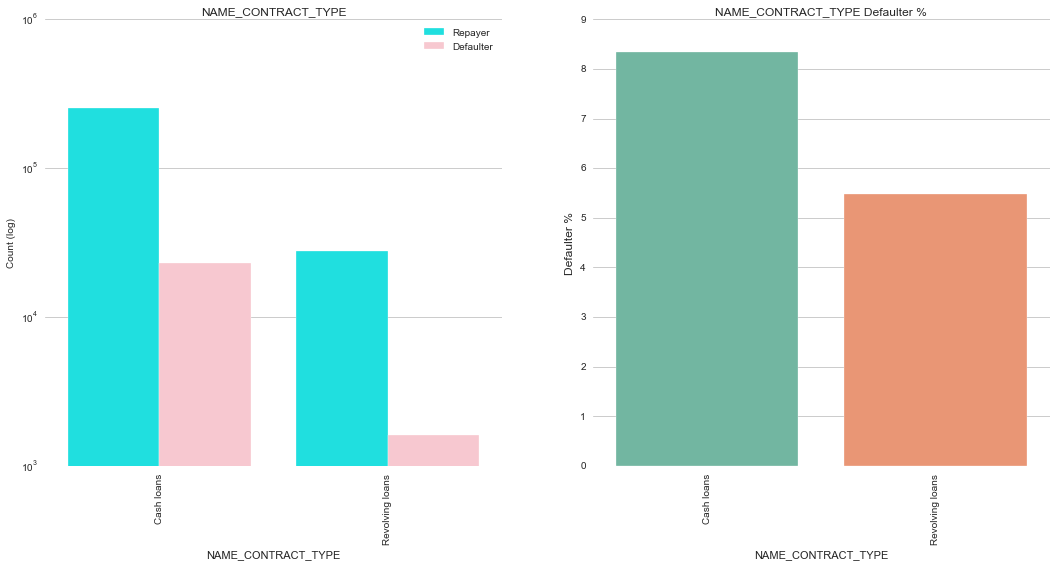

In [461]:
bivariate_analysis('NAME_CONTRACT_TYPE',True)

We could see the Revolving loans are in very less percentage still the defaulter percentage is high

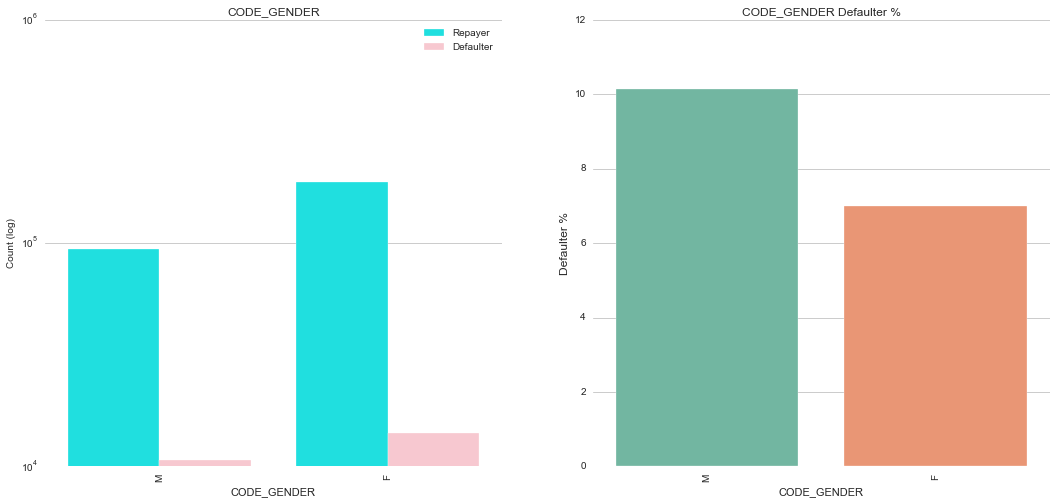

In [462]:
bivariate_analysis('CODE_GENDER',True)

We could see female applicants double as compare to male applicants but still Defaulter % is high among male as compared to female.

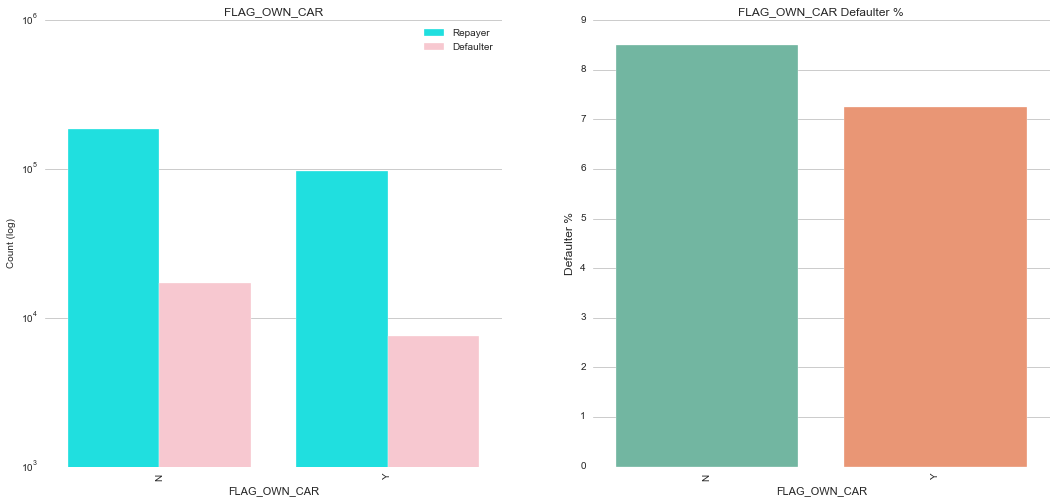

In [464]:
bivariate_analysis('FLAG_OWN_CAR')

People who do not own a car are more as compare to applicants who own the car but most likely both have equal chances of being a defaulter

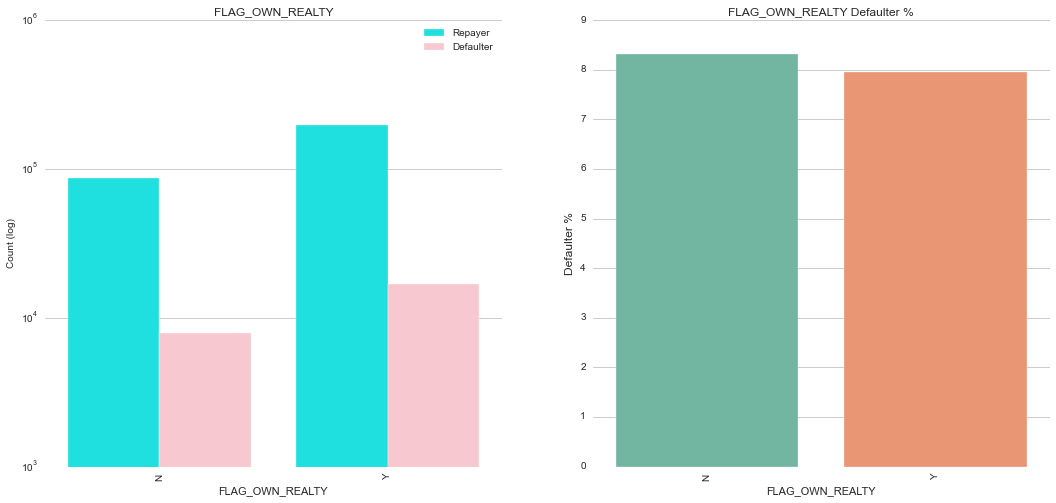

In [465]:
bivariate_analysis('FLAG_OWN_REALTY')

Most of the applicants own a real estate but still the changes of defaulter is same among both categories

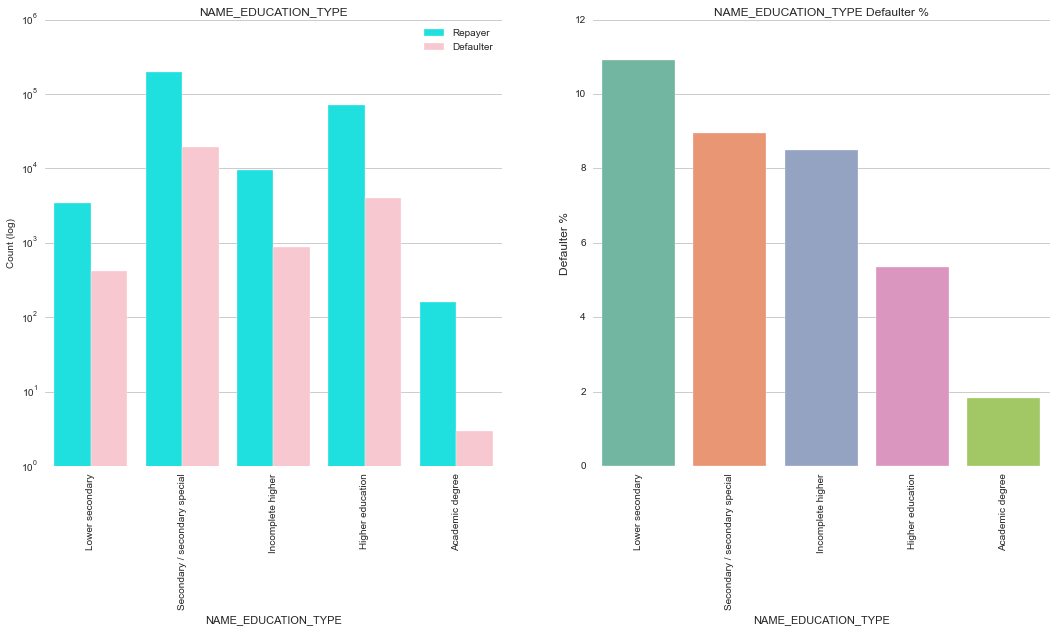

In [466]:
bivariate_analysis('NAME_EDUCATION_TYPE')

- Lower Secondary has the highest Defaulter percentage
- Most of the application are from Secondary/Secondary Special education.
- Rarest are from Academic degree with less % of defaulter as well

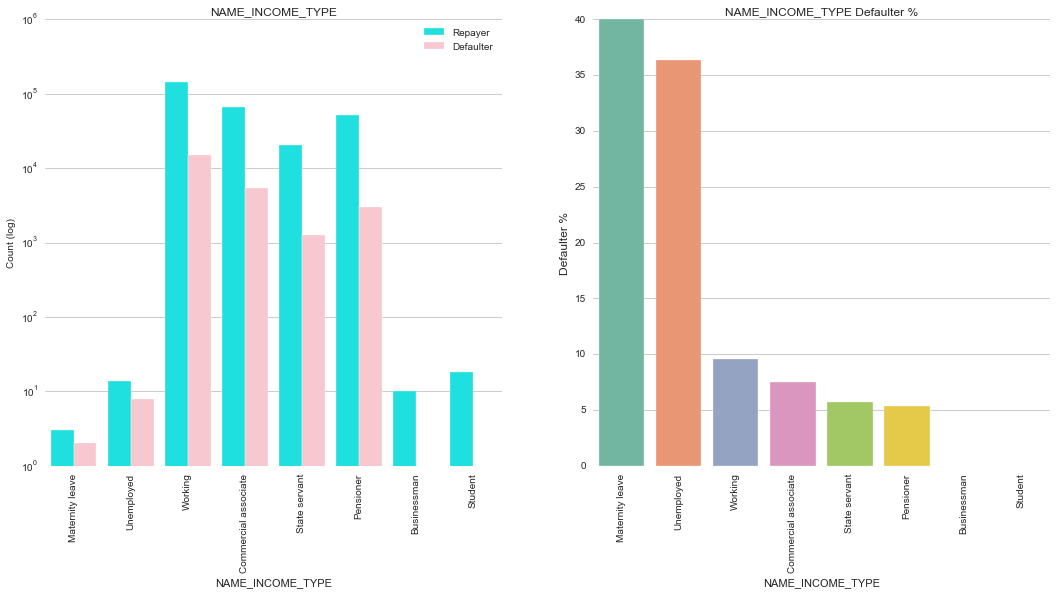

In [467]:
bivariate_analysis('NAME_INCOME_TYPE')

- Businessman and Student are the safest income_type to loan as always repay the loan back
- Maternity and Unemployed leave are the one with maximum percentage of defaulter with 30-40% of defaulter even though the count of the application with those type is not large.
- Most of the application are from Working followed by Commerical Associate , State Servant and pensioner.


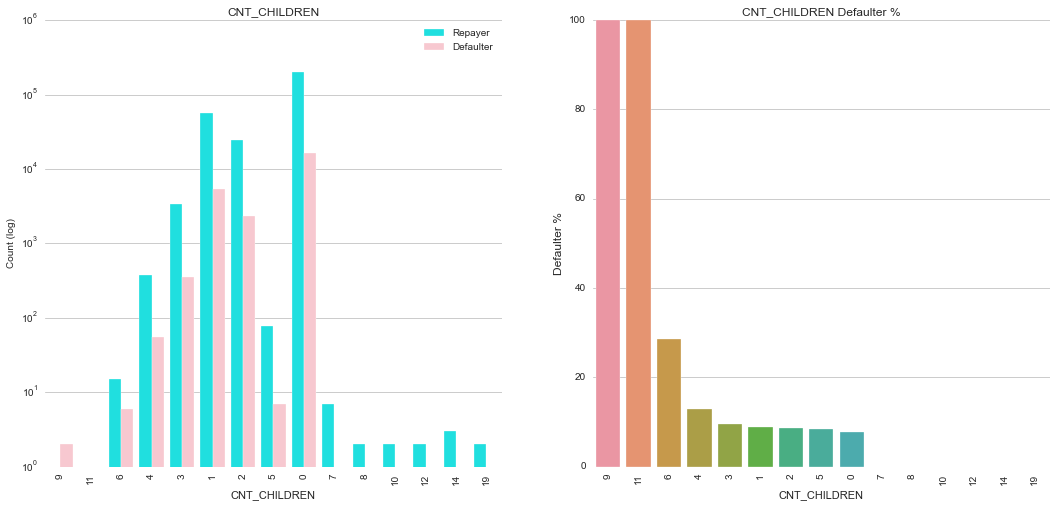

In [482]:
bivariate_analysis('CNT_CHILDREN')

- Most applicants dont have children or just have 1 child , and also have higher chances of repaying the loan
- We also observe that applicants having children between 9-12 has high % of being a defaulter with less applications
- Also applicants with more than 10 children have no records as a defaulter

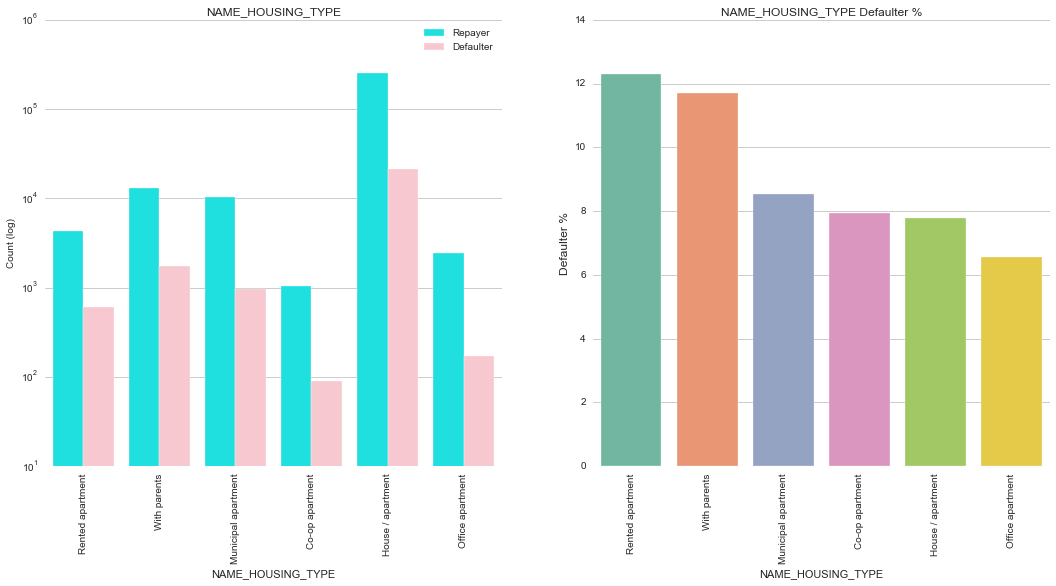

In [470]:
bivariate_analysis('NAME_HOUSING_TYPE')

- Most of the applicants have House/Apartment and comparatively less defaulter %
- Most defaulter lies under the category of Rented Apartment followed by Living with Parents

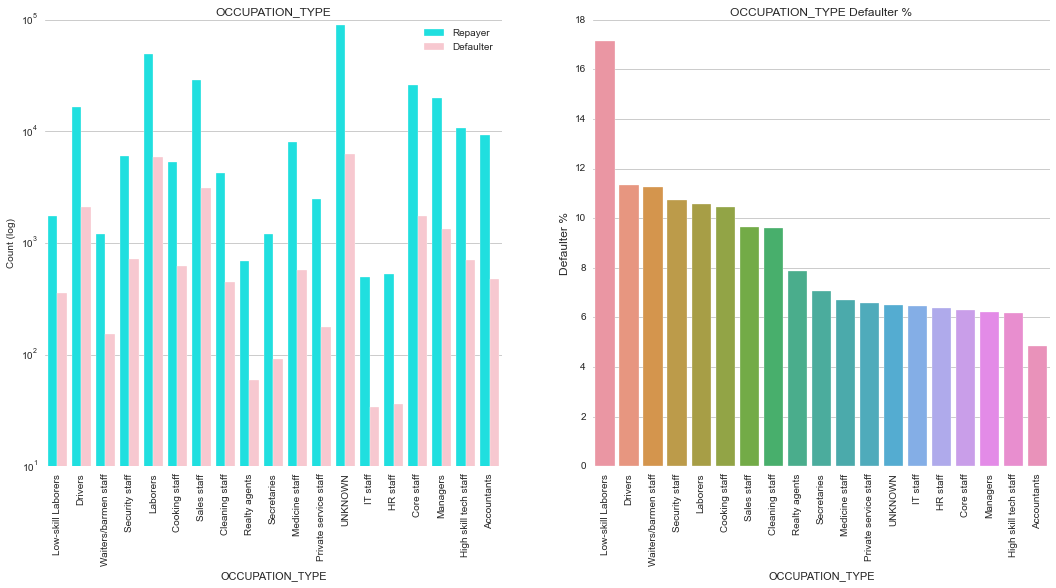

In [471]:
bivariate_analysis('OCCUPATION_TYPE')

- Most of the applicants have not revealed their occupation but have less % of defaulter
- The occupation with most Default % is Low-skill Laborers followed by Drivers and Waiters/barmen staff

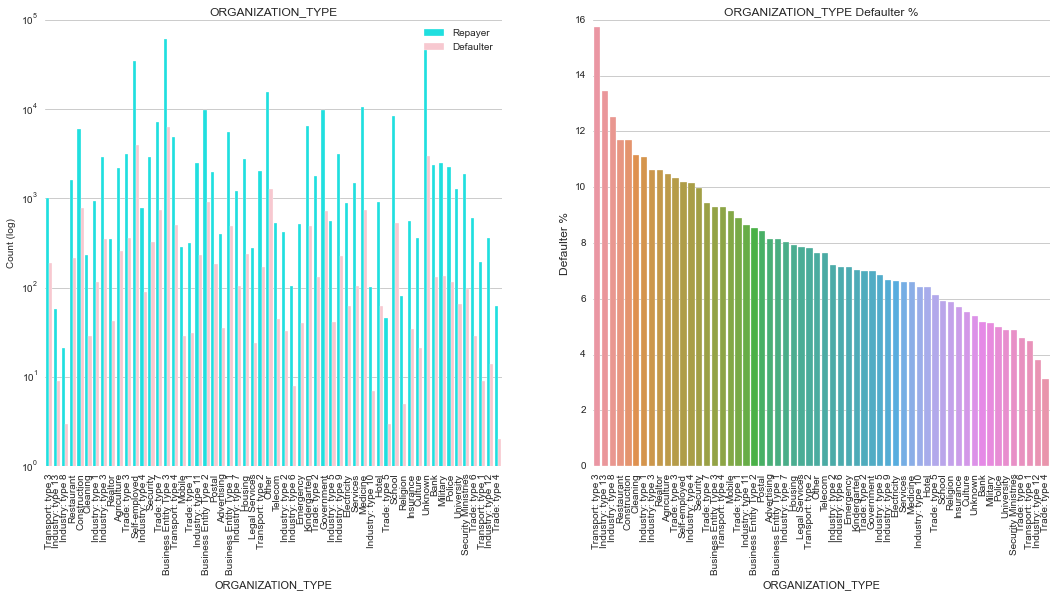

In [472]:
bivariate_analysis('ORGANIZATION_TYPE')

- Most of the applicants have the category unknown under organization type
- The category with most default are Transport Type 3, Industry Type 13, 8, Restaurants, Construction
- The Category with less defaulter are Transport Type 1, Industry Type 12, Trade Type 4

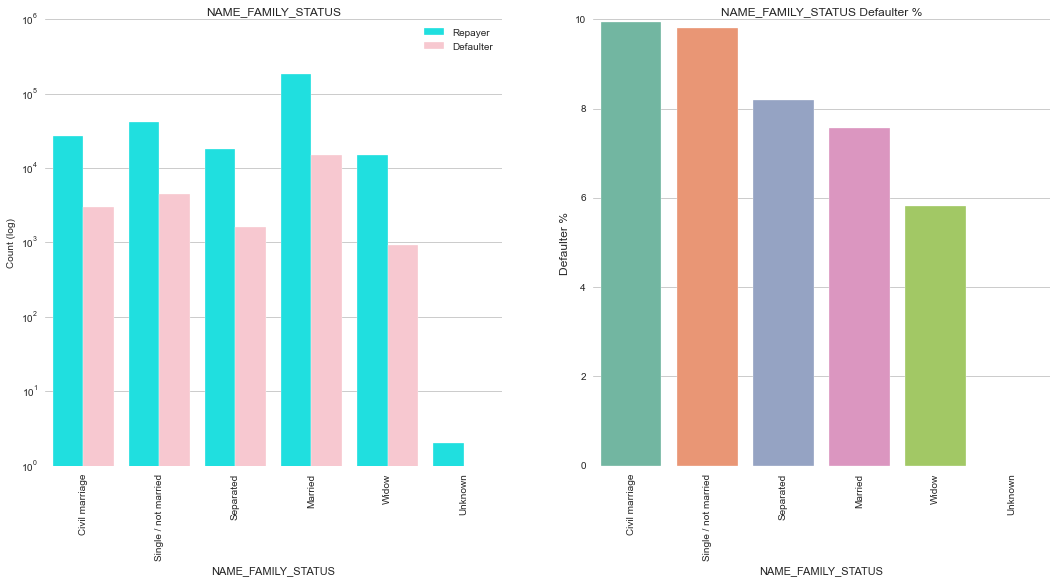

In [474]:
bivariate_analysis('NAME_FAMILY_STATUS')

- Most of the applicants who applied for loan are married followed by single/not married
- We observed that people with civil marriage or single are tends to be default
- Comparatively people who are married or window tends to repay the loan

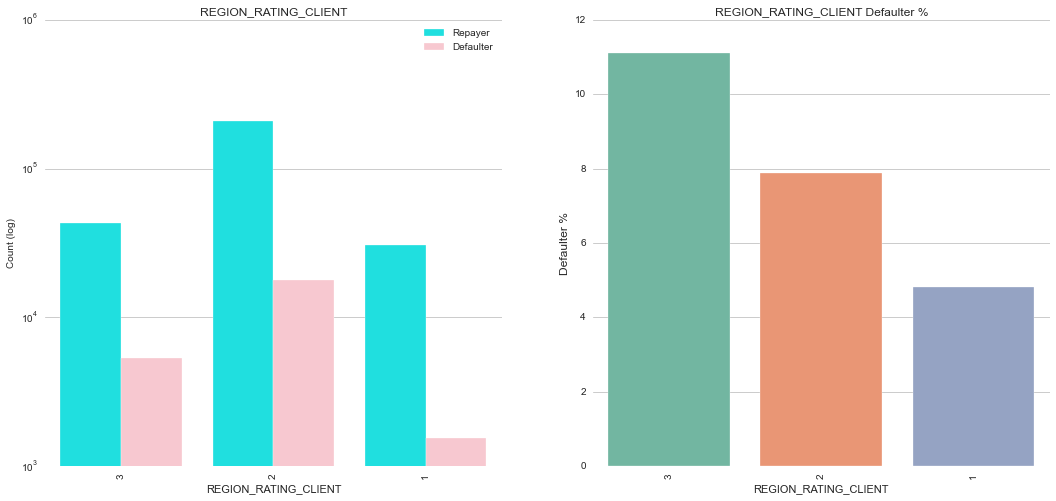

In [475]:
bivariate_analysis('REGION_RATING_CLIENT')

- Applicants with 3 as Region Rating are more likely to be defaulter
- And among rating 1 is less prone to being a defaulter

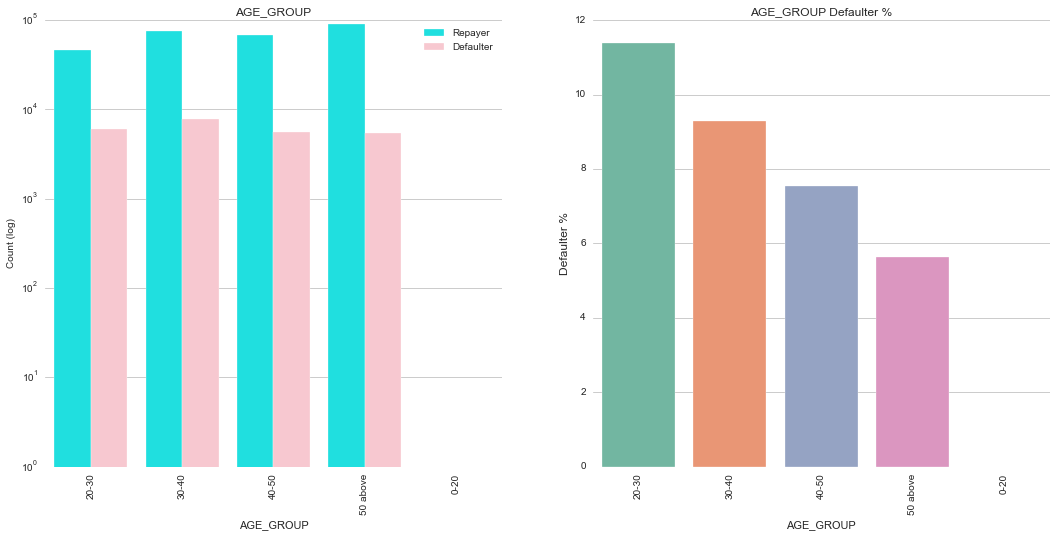

In [478]:
bivariate_analysis('AGE_GROUP')

- People among the age group from 20-40 have high % of being a defaulter an the safest are above 50 age group

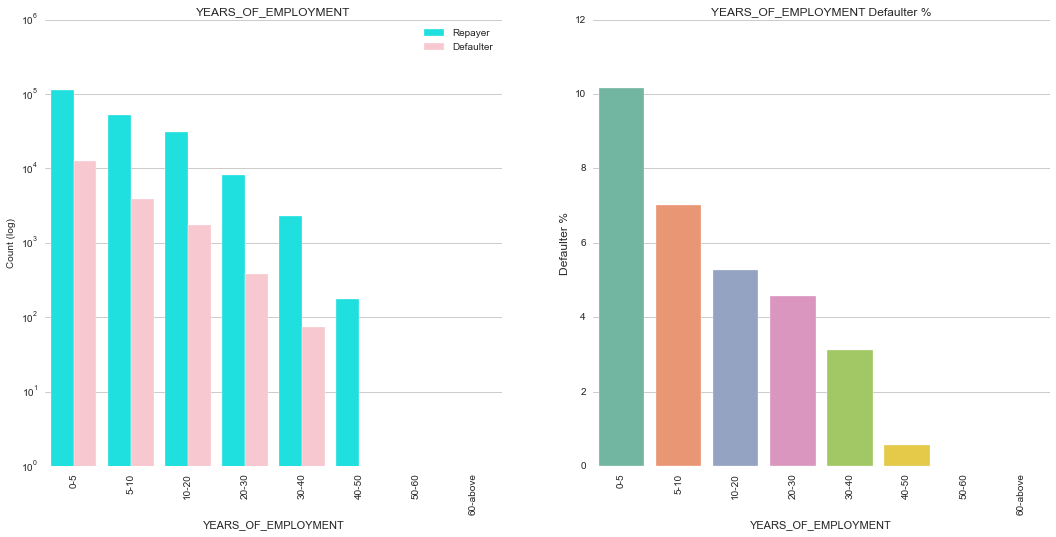

In [479]:
bivariate_analysis('YEARS_OF_EMPLOYMENT')

- Most of the applications are from the year of experience 0-5 group but this has highest percentage of being a defaulter.
- People with more years of experience have less percentage of being a defaulter
- Safest is the group of 40-50

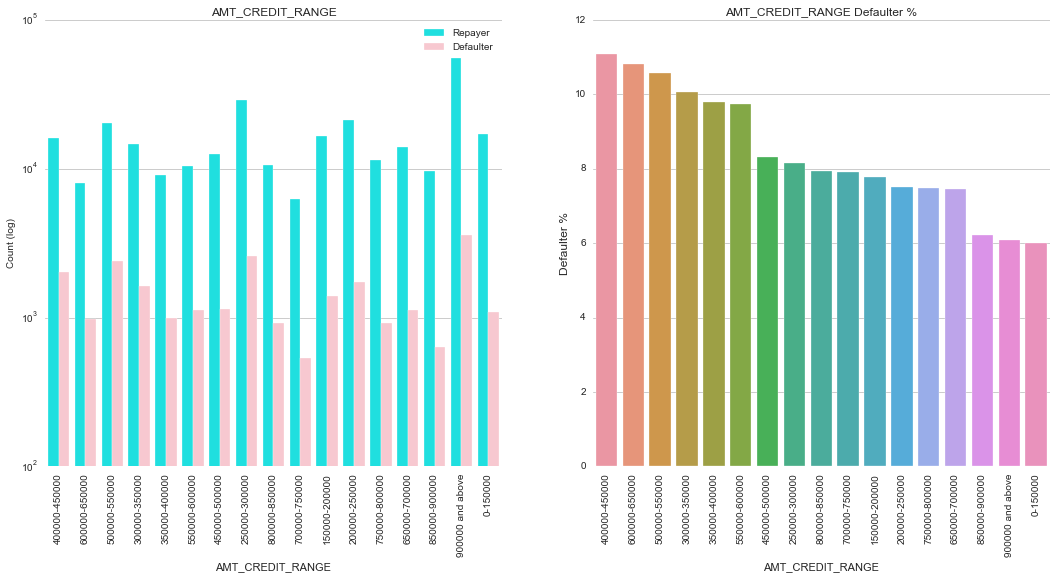

In [480]:
bivariate_analysis('AMT_CREDIT_RANGE')

- We could see applicants who applied for loan amount more than 900 K are the most as well as they are more likely to repay the loan amount as well.
- The highest percentage of defaulter lies between the loan amt 400k - 600K
- 90% of the loan applied is less than 900K

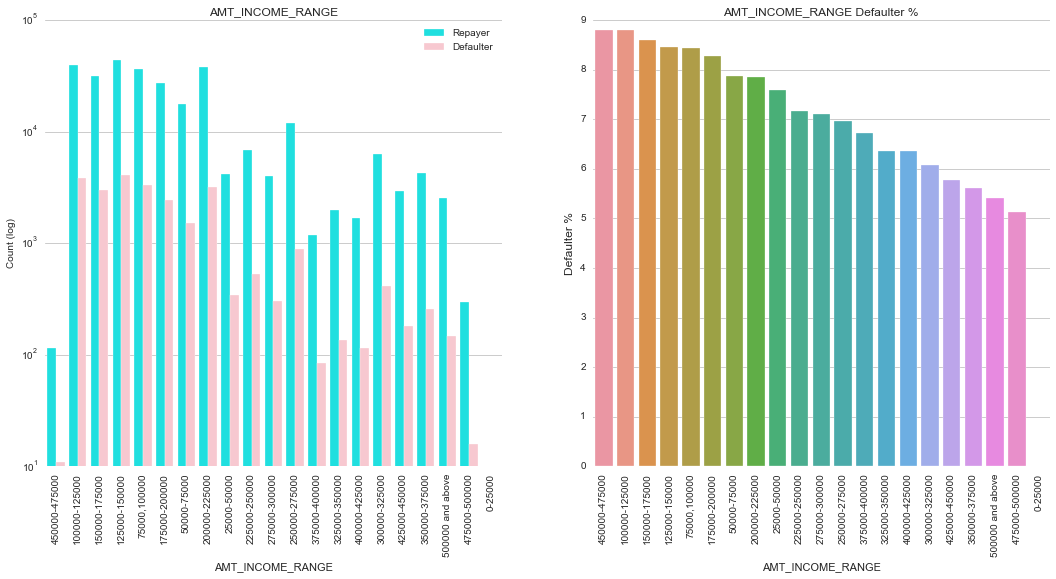

In [641]:
bivariate_analysis('AMT_INCOME_RANGE')

- Maximumn applicants who are likely to a defaulter have income ranges from 100k -225K
- Most of the applicants have income less than 300K
- People with more income are tends to be repayer

### Multi-variate analysis

In [486]:
application_data.groupby('NAME_INCOME_TYPE')['TARGET'].describe()

count      mean       std  min  25%  50%  75%  max
NAME_INCOME_TYPE                                                           
Businessman               10.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Commercial associate   71617.0  0.074843  0.263139  0.0  0.0  0.0  0.0  1.0
Maternity leave            5.0  0.400000  0.547723  0.0  0.0  0.0  1.0  1.0
Pensioner              55362.0  0.053864  0.225750  0.0  0.0  0.0  0.0  1.0
State servant          21703.0  0.057550  0.232895  0.0  0.0  0.0  0.0  1.0
Student                   18.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Unemployed                22.0  0.363636  0.492366  0.0  0.0  0.0  1.0  1.0
Working               158774.0  0.095885  0.294434  0.0  0.0  0.0  0.0  1.0

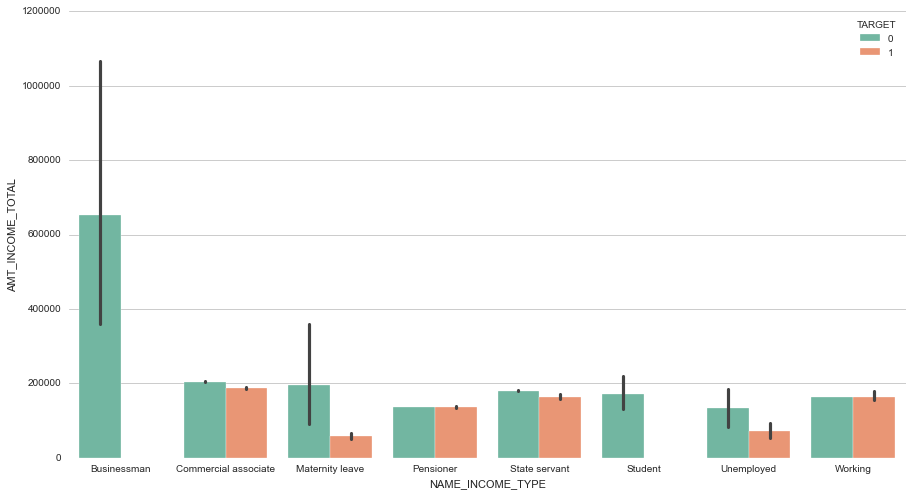

In [494]:
plt.figure(figsize=[15,8])
sns.barplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',hue='TARGET',data=application_data)
plt.show()

Income of Businessman is highest and negligible defaulter records, we could see the same graph for Student

#### Lets divide the data into two parts Target - 1 (Defaulter) and Target - 0 (Repayer) and analyze the data

In [606]:
## Two different data set 
repayer_data = application_data[application_data['TARGET']==0]
defaulter_data = application_data[application_data['TARGET']==1]

In [607]:
# with target value = 0 (Repayer)
repayer_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE  AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED YEARS_OF_EMPLOYMENT
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0           Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    250000-275000  900000 and above   45     40-50               3                 0-5
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0    Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                    2                           2                     MONDAY                        9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0      50000-75000          0-150000   52  50 above               0                 NaN
3      100006       0         Cash loans           F            N               Y             0          135000.0    312682.5      29686.5         297000.0    Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019       19005           3039             9833.0             2437        Laborers              2.0                    2                           2                  WEDNESDAY                       17                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       0.0                       2.0                       0.0                  -617.0                         0.0                        0.0                         0.0

In [608]:
# with target value =1 (Defaulter)
defaulter_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE  AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED YEARS_OF_EMPLOYMENT
0       100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0    200000-225000     400000-450000   25     20-30               1                 0-5
26      100031       1         Cash loans           F            N               Y             0          112500.0    979992.0      27076.5         702000.0   Unaccompanied               Working  Secondary / secondary special                 Widow  House / apartment                    0.018029       18724           2628             6573.0             1827   Cooking staff              1.0                    3                           2                     MONDAY                        9                           0                          0                           0                      0                      0                       0  Business Entity Type 3                      10.0                       1.0                      10.0                       0.0                  -161.0                         0.0                        0.0                         0.0                        0.0                        2.0                         2.0    100000-125000  900000 and above   51  50 above               7                5-10
40      100047       1         Cash loans           M            N               Y             0          202500.0   1193580.0      35028.0         855000.0   Unaccompanied  Commercial associate  Secondary / secondary special               Married  House / apartment                    0.025164       17482           1262             1182.0             1029        Laborers              2.0                    2                           2                    TUESDAY                        9                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       0.0                       0.0                       0.0                       0.0                 -1075.0                         0.0                        0.0         

In [609]:
# Correlation matrix for repayer
repayer_corr=repayer_data.corr()
repayer_corr

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR       AGE  YEARS_EMPLOYED
SK_ID_CURR                    1.000000     NaN     -0.000716          0.001739   -0.000342     0.000071        -0.000235                    0.000360    0.001346       0.001744           0.001475         0.000077        -0.002789                -0.000115                    0.000104                 -0.000697                  0.000553                 -0.000743                  0.002375               -0.000999                   -0.001774                  -0.001626                    0.002298                  -0.000037                   0.000963                    0.003852  0.001318        0.001742
TARGET                             NaN     NaN           NaN               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN       NaN             NaN
CNT_CHILDREN                 -0.000716     NaN      1.000000          0.027397    0.003081     0.020909        -0.000559                   -0.024363   -0.336966      -0.245174          -0.185792         0.028751         0.878571                -0.005244                   -0.012342                  0.014532                 -0.002193                  0.014199                 -0.002125               -0.008501                    0.000147                   0.001057                   -0.000315                  -0.007640                  -0.004218                   -0.035861 -0.336907       -0.245173
AMT_INCOME_TOTAL              0.001739     NaN      0.027397          1.000000    0.342799     0.418948         0.349426                    0.167851   -0.062609      -0.140392          -0.064937        -0.022896         0.034254                 0.076743                    0.068510                 -0.028647                 -0.027998                 -0.028507                 -0.027897               -0.041339                    0.002707                   0.008029                    0.008647                   0.058682                   0.017676                    0.034384 -0.062494       -0.140394
AMT_CREDIT                   -0.000342     NaN      0.003081          0.342799    1.000000     0.771297         0.987022                    0.100604    0.047378      -0.070104          -0.013477         0.001464         0.064536                 0.053619                    0.024617                 -0.000199                 -0.019433                 -0.000180                 -0.021859               -0.069541                   -0.002267                   0.005135                    0.000941                   0.055063                   0.021825                   -0.037519  0.047366       -0.070105
AMT_ANNUITY                   0.000071     NaN      0.020909          0.418948    0.771297     1.000000         0.776421                    0.120977   -0.012260      -0.104975          -0.039435        -0.014111         0.075789                 0.053584                    0.041983                 -0.012473                 -0.022160                 -0.012277                 -0.023052               -0.062012             

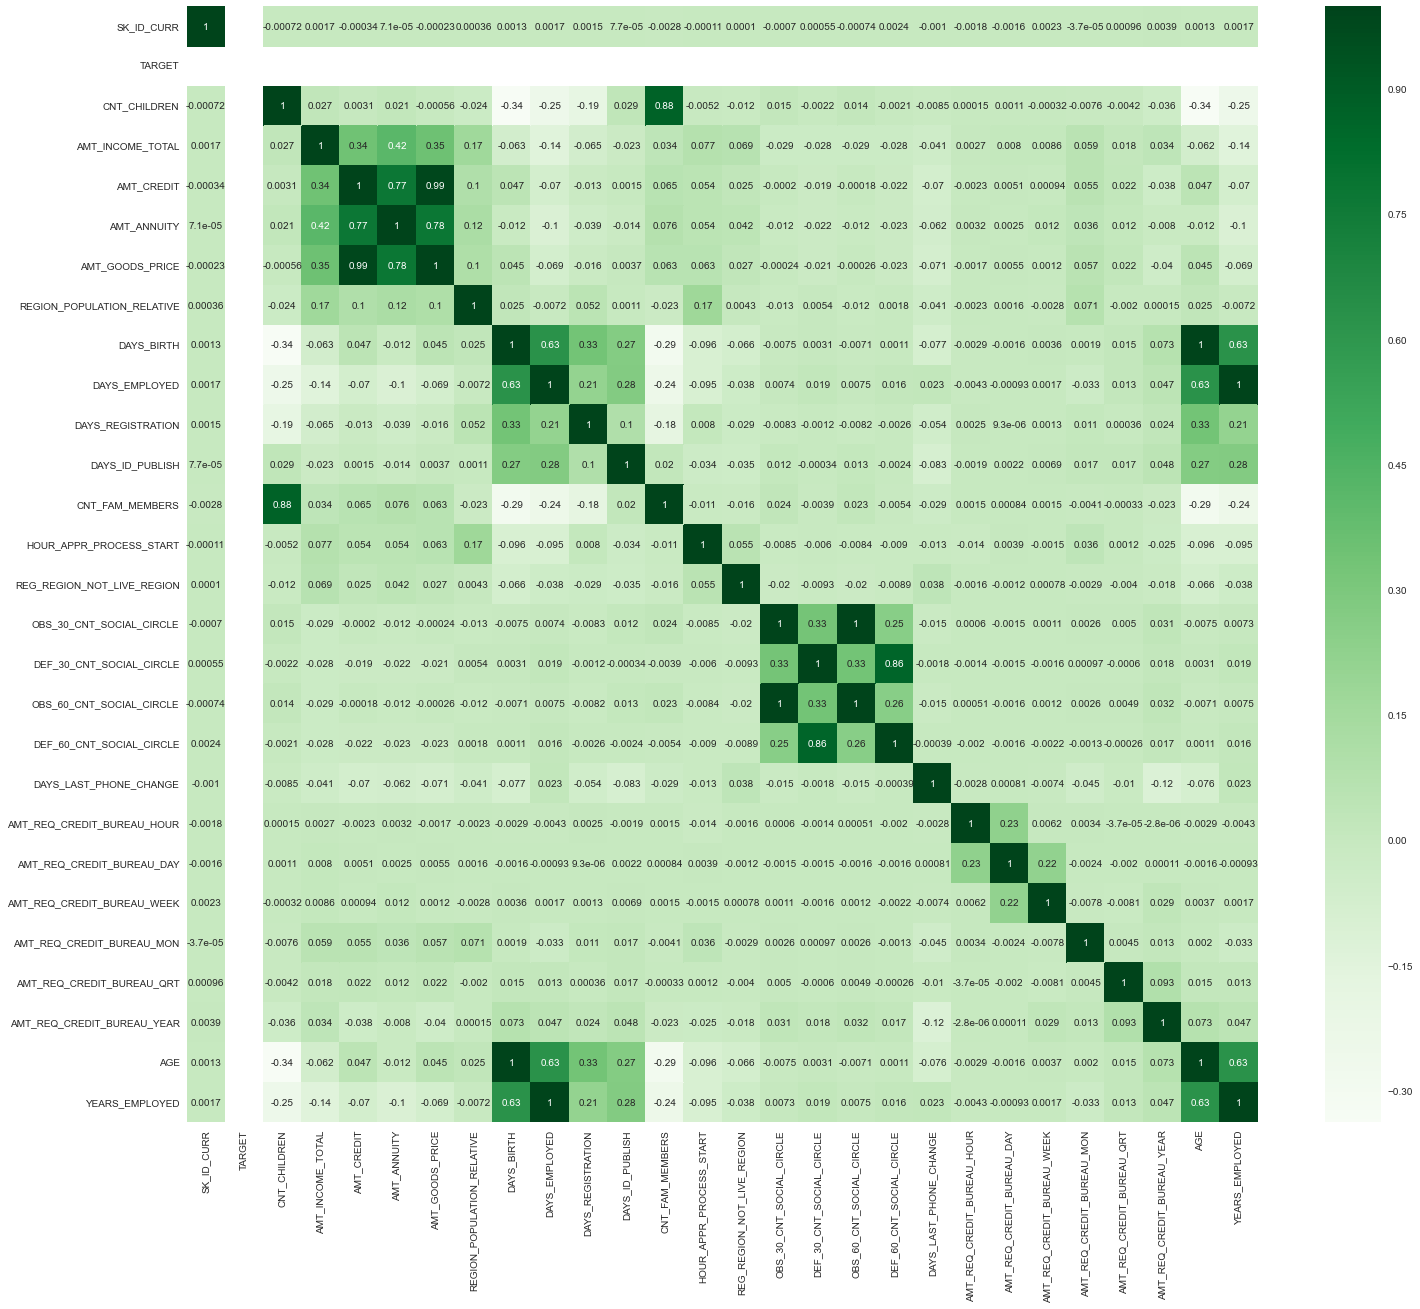

In [610]:
# heatmap plot to analyze linear relationship between the columns with respect to the correlation matrix calculated for repayer
plt.figure(figsize=[24,20])
sns.heatmap(repayer_corr,annot=True,cmap='Greens')
plt.show()

In [611]:
# Correlation matrix for defaulter
defaulter_corr=defaulter_data.corr()
defaulter_corr

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR       AGE  YEARS_EMPLOYED
SK_ID_CURR                    1.000000     NaN     -0.005144         -0.010165   -0.001290    -0.007578        -0.001814                    0.006301    0.001254      -0.005161          -0.006342         0.002539        -0.003816                 0.005004                   -0.004249                 -0.009424                 -0.005567                 -0.009087                 -0.009440                0.002455                   -0.011106                  -0.007388                   -0.003075                   0.005180                  -0.001614                    0.006843  0.001160       -0.005166
TARGET                             NaN     NaN           NaN               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN       NaN             NaN
CNT_CHILDREN                 -0.005144     NaN      1.000000          0.004796   -0.001675     0.031257        -0.008111                   -0.031975   -0.259109      -0.192864          -0.149154         0.032299         0.885484                -0.023899                   -0.024322                  0.025909                  0.001520                  0.025285                 -0.005039                0.011547                    0.000316                  -0.011255                   -0.009316                  -0.008852                  -0.013029                   -0.027253 -0.259222       -0.192866
AMT_INCOME_TOTAL             -0.010165     NaN      0.004796          1.000000    0.038131     0.046421         0.037591                    0.009135   -0.003096      -0.014977          -0.000158         0.004215         0.006654                 0.013775                    0.007577                 -0.004682                 -0.005170                 -0.004588                 -0.004852               -0.002429                    0.001079                   0.000135                    0.000941                   0.005718                   0.001037                    0.004516 -0.003154       -0.014979
AMT_CREDIT                   -0.001290     NaN     -0.001675          0.038131    1.000000     0.752195         0.982783                    0.069161    0.135316       0.001930           0.025854         0.052329         0.051224                 0.031782                    0.019540                  0.019856                 -0.025503                  0.020242                 -0.030461               -0.110851                   -0.003771                   0.004346                    0.010598                   0.056227                  -0.007201                   -0.020698  0.135070        0.001936
AMT_ANNUITY                  -0.007578     NaN      0.031257          0.046421    0.752195     1.000000         0.752295                    0.071690    0.014303      -0.081207          -0.034279         0.016767         0.075711                 0.031236                    0.034807                  0.005432                 -0.021794                  0.006465                 -0.026966               -0.079870             

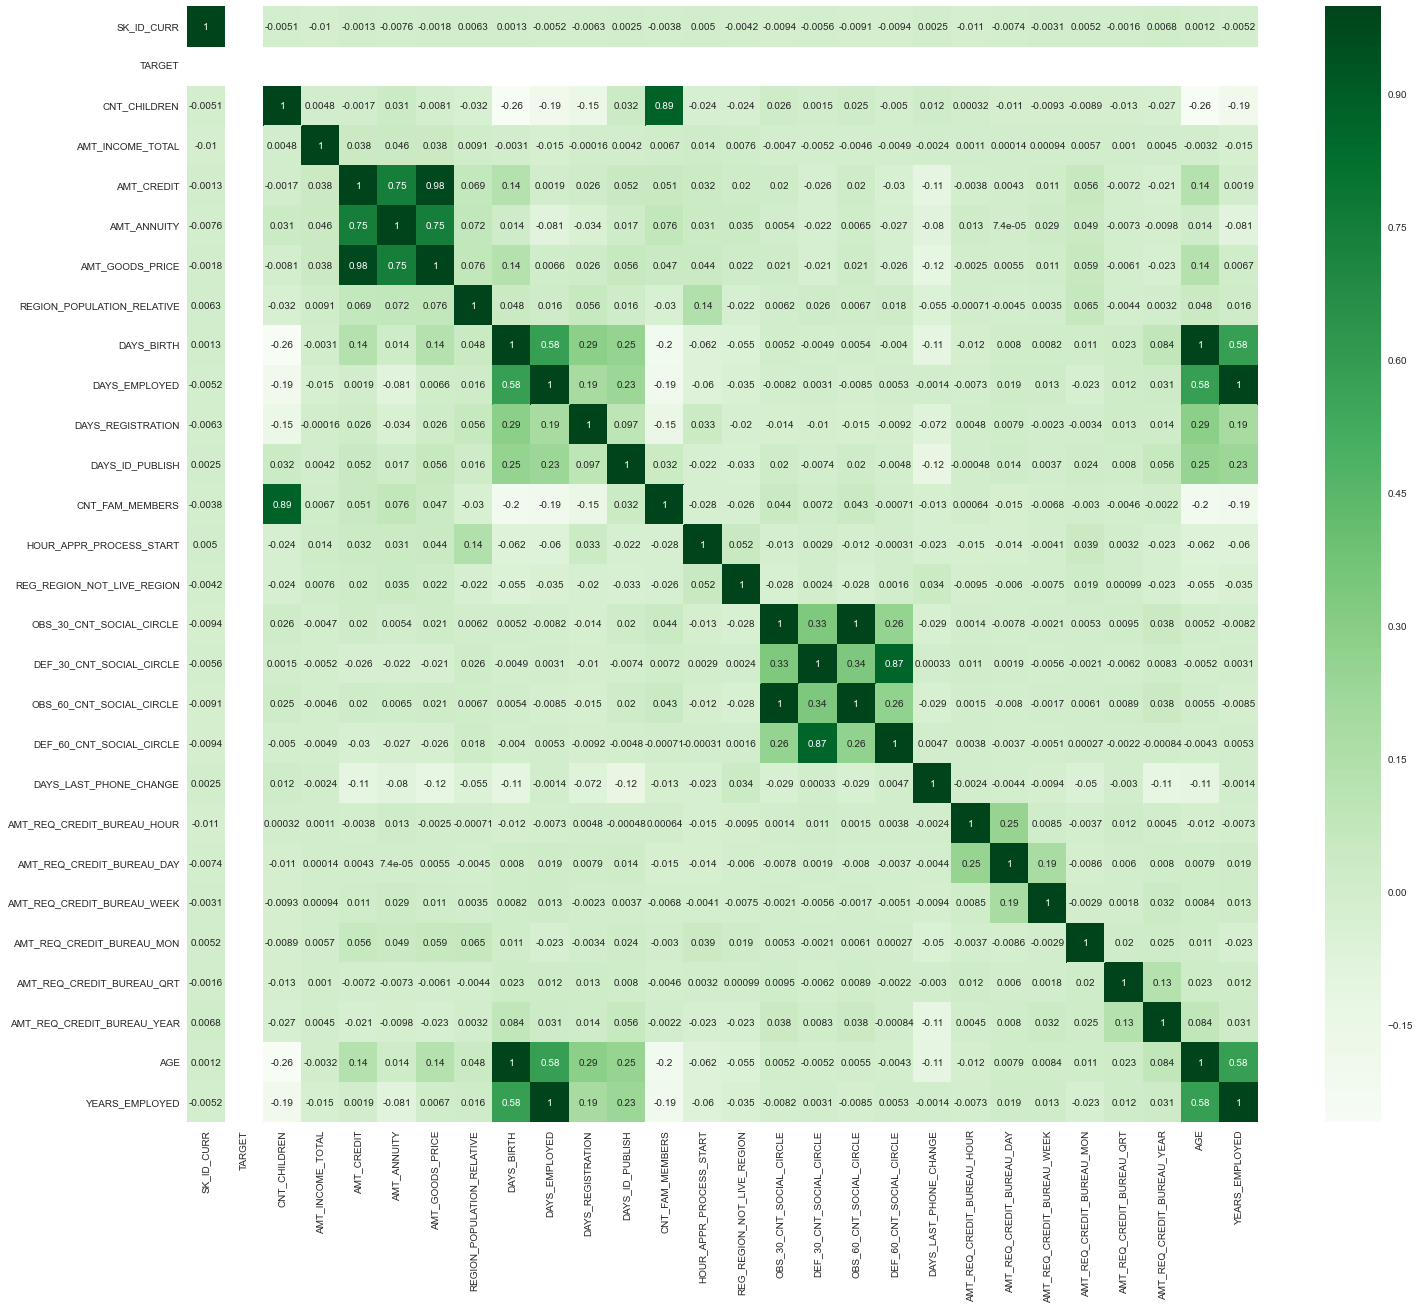

In [612]:
# heatmap plot to analyze linear relationship between the columns with respect to the correlation matrix calculated for defaulter
plt.figure(figsize=[24,20])
sns.heatmap(defaulter_corr,annot=True,cmap='Greens')
plt.show()

##### We have some columns with same data like Age and age_group , years_employed and days_employed, etc , need to remove some column and create the matrix again 
- 'SK_ID_CURR','TARGET',,'AMT_INCOME_RANGE','AMT_CREDIT_RANGE','AGE','AGE_GROUP','YEARS_EMPLOYED','YEARS_OF_EMPLOYMENT'

In [613]:
application_data.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AM

In [614]:
list1=[
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [615]:
repayer_data = application_data.loc[application_data['TARGET']==0,list1]
defaulter_data = application_data.loc[application_data['TARGET']==1,list1]

In [616]:
repayer_corr=repayer_data.corr()
repayer_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN                    1.000000          0.027397    0.003081     0.020909        -0.000559                   -0.024363   -0.336966      -0.245174          -0.185792         0.028751         0.878571                -0.005244                   -0.012342                  0.014532                 -0.002193                  0.014199                 -0.002125               -0.008501                    0.000147                   0.001057                   -0.000315                  -0.007640                  -0.004218                   -0.035861
AMT_INCOME_TOTAL                0.027397          1.000000    0.342799     0.418948         0.349426                    0.167851   -0.062609      -0.140392          -0.064937        -0.022896         0.034254                 0.076743                    0.068510                 -0.028647                 -0.027998                 -0.028507                 -0.027897               -0.041339                    0.002707                   0.008029                    0.008647                   0.058682                   0.017676                    0.034384
AMT_CREDIT                      0.003081          0.342799    1.000000     0.771297         0.987022                    0.100604    0.047378      -0.070104          -0.013477         0.001464         0.064536                 0.053619                    0.024617                 -0.000199                 -0.019433                 -0.000180                 -0.021859               -0.069541                   -0.002267                   0.005135                    0.000941                   0.055063                   0.021825                   -0.037519
AMT_ANNUITY                     0.020909          0.418948    0.771297     1.000000         0.776421                    0.120977   -0.012260      -0.104975          -0.039435        -0.014111         0.075789                 0.053584                    0.041983                 -0.012473                 -0.022160                 -0.012277                 -0.023052               -0.062012                    0.003220                   0.002465                    0.012377                   0.036291                   0.011660                   -0.008013
AMT_GOODS_PRICE                -0.000559          0.349426    0.987022     0.776421         1.000000                    0.103826    0.044650      -0.068527          -0.015891         0.003677         0.062763                 0.062710                    0.026738                 -0.000241                 -0.020731                 -0.000259                 -0.022910               -0.071362                   -0.001698                   0.005520                    0.001192                   0.056675                   0.022134                   -0.039762
REGION_POPULATION_RELATIVE     -0.024363          0.167851    0.100604     0.120977         0.103826                    1.000000    0.025244      -0.007198           0.052083         0.001071        -0.023425                 0.172814                    0.004306                 -0.013009                  0.005409                 -0.012493                  0.001808               -0.041165                   -0.002334                   0.001629                   -0.002814                   0.071495                  -0.001954                    0.000152
DAYS_BIRTH                     -0.336966         -0.062609    0.047378    -0.012260         0.044650                    0.025244    1.000000   

In [617]:
defaulter_corr=repayer_data.corr()
defaulter_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN                    1.000000          0.027397    0.003081     0.020909        -0.000559                   -0.024363   -0.336966      -0.245174          -0.185792         0.028751         0.878571                -0.005244                   -0.012342                  0.014532                 -0.002193                  0.014199                 -0.002125               -0.008501                    0.000147                   0.001057                   -0.000315                  -0.007640                  -0.004218                   -0.035861
AMT_INCOME_TOTAL                0.027397          1.000000    0.342799     0.418948         0.349426                    0.167851   -0.062609      -0.140392          -0.064937        -0.022896         0.034254                 0.076743                    0.068510                 -0.028647                 -0.027998                 -0.028507                 -0.027897               -0.041339                    0.002707                   0.008029                    0.008647                   0.058682                   0.017676                    0.034384
AMT_CREDIT                      0.003081          0.342799    1.000000     0.771297         0.987022                    0.100604    0.047378      -0.070104          -0.013477         0.001464         0.064536                 0.053619                    0.024617                 -0.000199                 -0.019433                 -0.000180                 -0.021859               -0.069541                   -0.002267                   0.005135                    0.000941                   0.055063                   0.021825                   -0.037519
AMT_ANNUITY                     0.020909          0.418948    0.771297     1.000000         0.776421                    0.120977   -0.012260      -0.104975          -0.039435        -0.014111         0.075789                 0.053584                    0.041983                 -0.012473                 -0.022160                 -0.012277                 -0.023052               -0.062012                    0.003220                   0.002465                    0.012377                   0.036291                   0.011660                   -0.008013
AMT_GOODS_PRICE                -0.000559          0.349426    0.987022     0.776421         1.000000                    0.103826    0.044650      -0.068527          -0.015891         0.003677         0.062763                 0.062710                    0.026738                 -0.000241                 -0.020731                 -0.000259                 -0.022910               -0.071362                   -0.001698                   0.005520                    0.001192                   0.056675                   0.022134                   -0.039762
REGION_POPULATION_RELATIVE     -0.024363          0.167851    0.100604     0.120977         0.103826                    1.000000    0.025244      -0.007198           0.052083         0.001071        -0.023425                 0.172814                    0.004306                 -0.013009                  0.005409                 -0.012493                  0.001808               -0.041165                   -0.002334                   0.001629                   -0.002814                   0.071495                  -0.001954                    0.000152
DAYS_BIRTH                     -0.336966         -0.062609    0.047378    -0.012260         0.044650                    0.025244    1.000000   

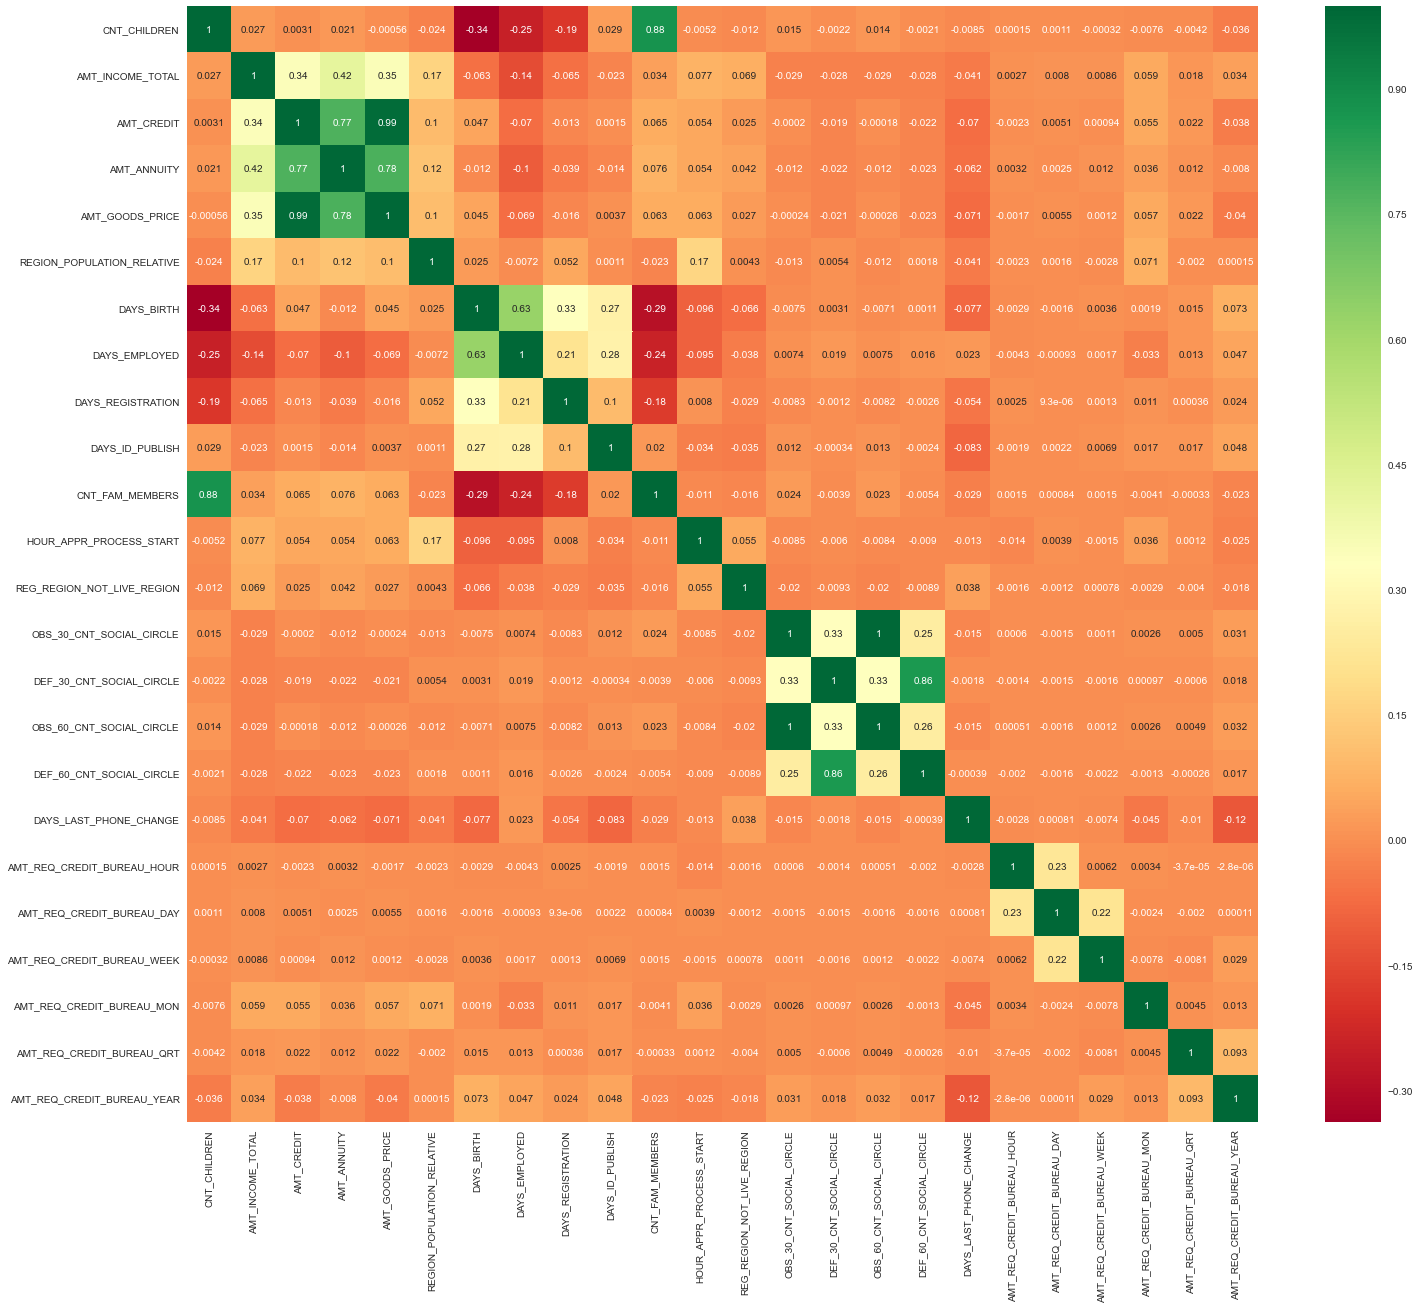

In [618]:
plt.figure(figsize=[24,20])
sns.heatmap(repayer_corr,annot=True,cmap='RdYlGn')
plt.show()

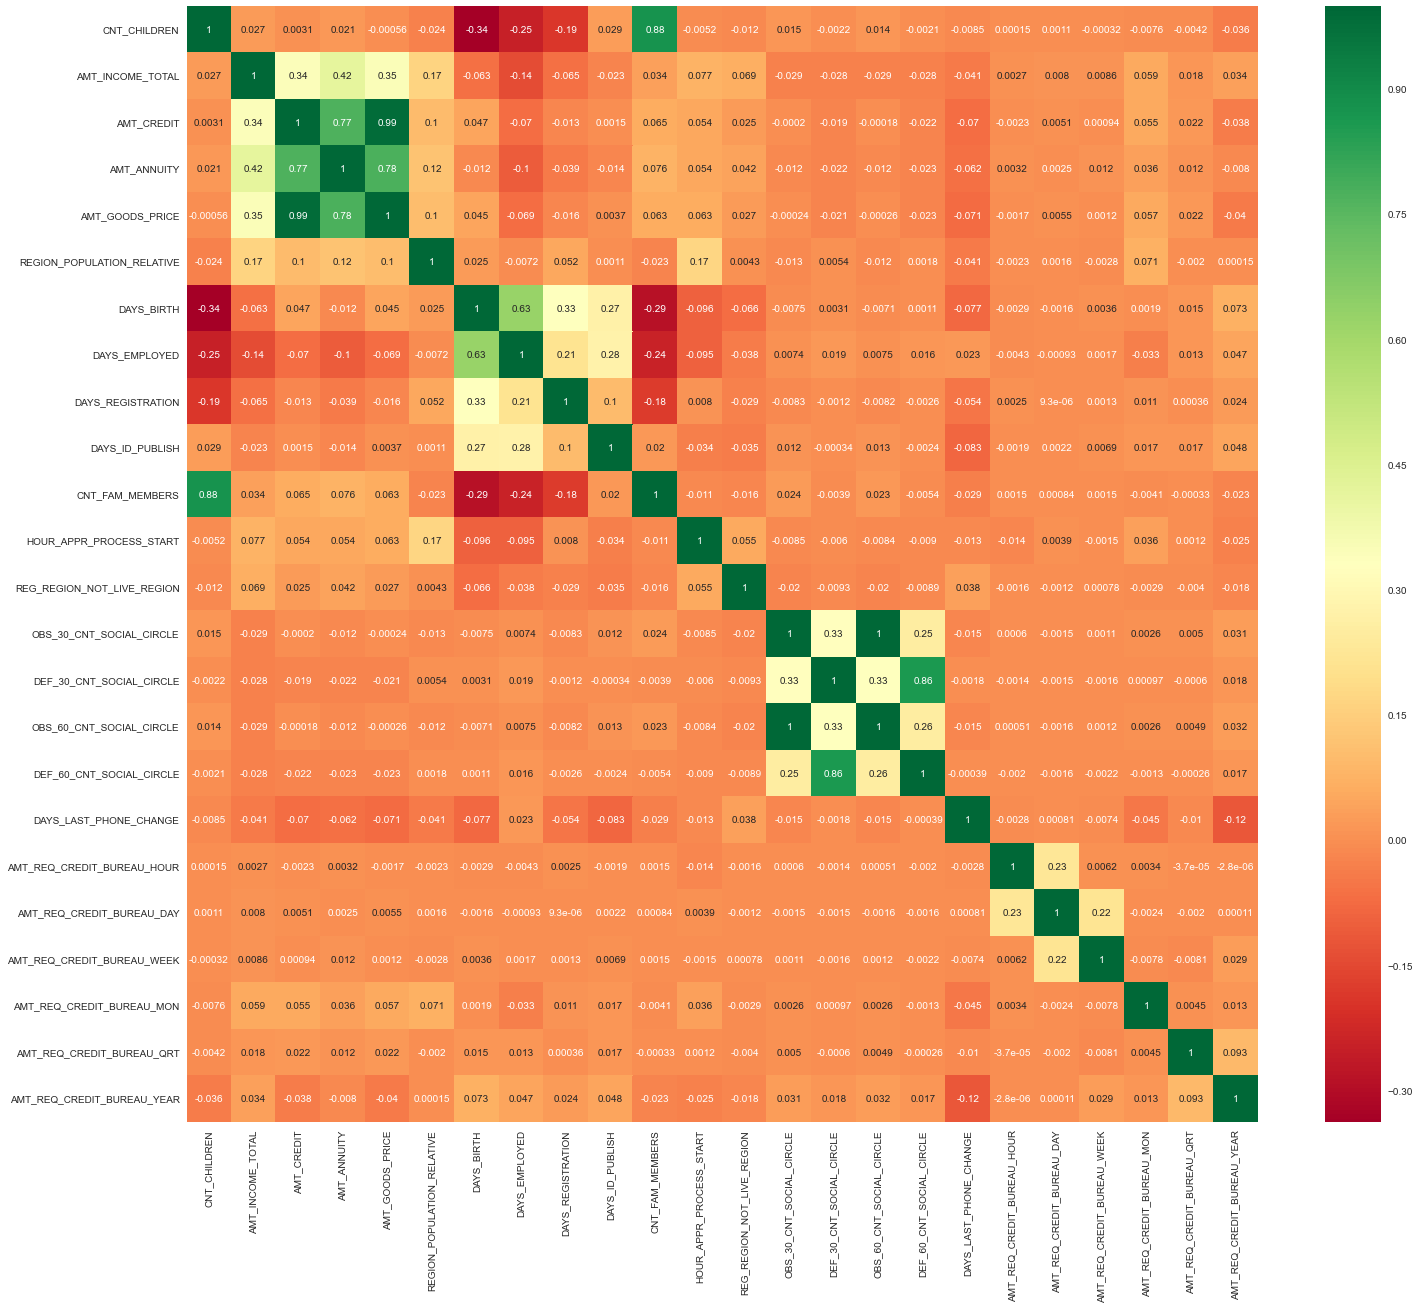

In [619]:
plt.figure(figsize=[24,20])
sns.heatmap(defaulter_corr,annot=True,cmap='RdYlGn')
plt.show()

In [627]:
repayer_corr_1=repayer_corr.where(np.tril(np.ones(repayer_corr.shape),k=-1).astype(bool))
repayer_corr_1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN                         NaN               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
AMT_INCOME_TOTAL                0.027397               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
AMT_CREDIT                      0.003081          0.342799         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
AMT_ANNUITY                     0.020909          0.418948    0.771297          NaN              NaN                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
AMT_GOODS_PRICE                -0.000559          0.349426    0.987022     0.776421              NaN                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
REGION_POPULATION_RELATIVE     -0.024363          0.167851    0.100604     0.120977         0.103826                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
DAYS_BIRTH                     -0.336966         -0.062609    0.047378    -0.012260         0.044650                    0.025244         NaN   

In [628]:
# creating a dataframe with new level using unstack()
repayer_corr_1 = repayer_corr_1.unstack().reset_index()

In [629]:
repayer_corr_1.columns=['variable_1', 'variable_2','correlation']
repayer_corr_1.head()

variable_1        variable_2  correlation
0  CNT_CHILDREN      CNT_CHILDREN          NaN
1  CNT_CHILDREN  AMT_INCOME_TOTAL     0.027397
2  CNT_CHILDREN        AMT_CREDIT     0.003081
3  CNT_CHILDREN       AMT_ANNUITY     0.020909
4  CNT_CHILDREN   AMT_GOODS_PRICE    -0.000559

In [630]:
#drop NaN values
repayer_corr_1.dropna(inplace=True)
repayer_corr_1

variable_1                  variable_2  correlation
1                  CNT_CHILDREN            AMT_INCOME_TOTAL     0.027397
2                  CNT_CHILDREN                  AMT_CREDIT     0.003081
3                  CNT_CHILDREN                 AMT_ANNUITY     0.020909
4                  CNT_CHILDREN             AMT_GOODS_PRICE    -0.000559
5                  CNT_CHILDREN  REGION_POPULATION_RELATIVE    -0.024363
6                  CNT_CHILDREN                  DAYS_BIRTH    -0.336966
7                  CNT_CHILDREN               DAYS_EMPLOYED    -0.245174
8                  CNT_CHILDREN           DAYS_REGISTRATION    -0.185792
9                  CNT_CHILDREN             DAYS_ID_PUBLISH     0.028751
10                 CNT_CHILDREN             CNT_FAM_MEMBERS     0.878571
11                 CNT_CHILDREN     HOUR_APPR_PROCESS_START    -0.005244
12                 CNT_CHILDREN  REG_REGION_NOT_LIVE_REGION    -0.012342
13                 CNT_CHILDREN    OBS_30_CNT_SOCIAL_CIRCLE     0.014532
14                 CNT_CHILDREN    DEF_30_CNT_SOCIAL_CIRCLE    -0.002193
15                 CNT_CHILDREN    OBS_60_CNT_SOCIAL_CIRCLE     0.014199
16                 CNT_CHILDREN    DEF_60_CNT_SOCIAL_CIRCLE    -0.002125
17                 CNT_CHILDREN      DAYS_LAST_PHONE_CHANGE    -0.008501
18                 CNT_CHILDREN  AMT_REQ_CREDIT_BUREAU_HOUR     0.000147
19                 CNT_CHILDREN   AMT_REQ_CREDIT_BUREAU_DAY     0.001057
20                 CNT_CHILDREN  AMT_REQ_CREDIT_BUREAU_WEEK    -0.000315
21                 CNT_CHILDREN   AMT_REQ_CREDIT_BUREAU_MON    -0.007640
22                 CNT_CHILDREN   AMT_REQ_CREDIT_BUREAU_QRT    -0.004218
23                 CNT_CHILDREN  AMT_REQ_CREDIT_BUREAU_YEAR    -0.035861
26             AMT_INCOME_TOTAL                  AMT_CREDIT     0.342799
27             AMT_INCOME_TOTAL                 AMT_ANNUITY     0.418948
28             AMT_INCOME_TOTAL             AMT_GOODS_PRICE     0.349426
29             AMT_INCOME_TOTAL  REGION_POPULATION_RELATIVE     0.167851
30             AMT_INCOME_TOTAL                  DAYS_BIRTH    -0.062609
31             AMT_INCOME_TOTAL               DAYS_EMPLOYED    -0.140392
32             AMT_INCOME_TOTAL           DAYS_REGISTRATION    -0.064937
33             AMT_INCOME_TOTAL             DAYS_ID_PUBLISH    -0.022896
34             AMT_INCOME_TOTAL             CNT_FAM_MEMBERS     0.034254
35             AMT_INCOME_TOTAL     HOUR_APPR_PROCESS_START     0.076743
36             AMT_INCOME_TOTAL  REG_REGION_NOT_LIVE_REGION     0.068510
37             AMT_INCOME_TOTAL    OBS_30_CNT_SOCIAL_CIRCLE    -0.028647
38             AMT_INCOME_TOTAL    DEF_30_CNT_SOCIAL_CIRCLE    -0.027998
39             AMT_INCOME_TOTAL    OBS_60_CNT_SOCIAL_CIRCLE    -0.028507
40             AMT_INCOME_TOTAL    DEF_60_CNT_SOCIAL_CIRCLE    -0.027897
41             AMT_INCOME_TOTAL      DAYS_LAST_PHONE_CHANGE    -0.041339
42             AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_HOUR     0.002707
43             AMT_INCOME_TOTAL   AMT_REQ_CREDIT_BUREAU_DAY     0.008029
44             AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_WEEK     0.008647
45             AMT_INCOME_TOTAL   AMT_REQ_CREDIT_BUREAU_MON     0.058682
46             AMT_INCOME_TOTAL   AMT_REQ_CREDIT_BUREAU_QRT     0.017676
47             AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_YEAR     0.034384
51                   AMT_CREDIT                 AMT_ANNUITY     0.771297
52                   AMT_CREDIT             AMT_GOODS_PRICE     0.987022
53                   AMT_CREDIT  REGION_POPULATION_RELATIVE     0.100604
54                   AMT_CREDIT                  DAYS_BIRTH     0.047378
55                   AMT_CREDIT               DAYS_EMPLOYED    -0.070104
56                   AMT_CREDIT           DAYS_REGISTRATION    -0.013477
57                   AMT_CREDIT             DAYS_ID_PUBLISH     0.001464
58                   AMT_CREDIT             CNT_FAM_MEMBERS     0.064536
59                   AMT_CREDIT     HOUR_APPR_PROCESS_START     0.053619
60    

In [631]:
# get the top 10 columns with maximum correlation
rep_corr_top10 = repayer_corr_1.sort_values(by='correlation',ascending=False).head(10)

In [632]:
rep_corr_top10

variable_1                variable_2  correlation
327  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE     0.998510
52                 AMT_CREDIT           AMT_GOODS_PRICE     0.987022
10               CNT_CHILDREN           CNT_FAM_MEMBERS     0.878571
352  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE     0.859371
76                AMT_ANNUITY           AMT_GOODS_PRICE     0.776421
51                 AMT_CREDIT               AMT_ANNUITY     0.771297
151                DAYS_BIRTH             DAYS_EMPLOYED     0.626114
27           AMT_INCOME_TOTAL               AMT_ANNUITY     0.418948
28           AMT_INCOME_TOTAL           AMT_GOODS_PRICE     0.349426
26           AMT_INCOME_TOTAL                AMT_CREDIT     0.342799

### We could see below among the Repayers
- AMT_CREDIT (Credit amount of the loan)  columns is highly related to below factors
    - AMT_GOODS_PRICE - (The price of the goods for which the loan is given)
    - AMT_ANNUITY (Loan Annuity)
    - AMT_TOTAL_INCOME (Income of client)

In [633]:
# Lets find the same for defaulter
defaulter_corr_1=defaulter_corr.where(np.tril(np.ones(defaulter_corr.shape),k=-1).astype(bool))
defaulter_corr_1.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN               NaN               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
AMT_INCOME_TOTAL      0.027397               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
AMT_CREDIT            0.003081          0.342799         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
AMT_ANNUITY           0.020909          0.418948    0.771297          NaN              NaN                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
AMT_GOODS_PRICE      -0.000559          0.349426    0.987022     0.776421              NaN                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN

In [634]:
defaulter_corr_1=defaulter_corr_1.unstack().reset_index()

In [635]:
defaulter_corr_1.columns=['variable_1','variable_2','correlation']
defaulter_corr_1.head()

variable_1        variable_2  correlation
0  CNT_CHILDREN      CNT_CHILDREN          NaN
1  CNT_CHILDREN  AMT_INCOME_TOTAL     0.027397
2  CNT_CHILDREN        AMT_CREDIT     0.003081
3  CNT_CHILDREN       AMT_ANNUITY     0.020909
4  CNT_CHILDREN   AMT_GOODS_PRICE    -0.000559

In [636]:
defaulter_corr_1.dropna(inplace=True)

In [637]:
defaulter_corr_1_top10=defaulter_corr_1.sort_values(by='correlation',ascending=False).head(10)

In [638]:
defaulter_corr_1_top10

variable_1                variable_2  correlation
327  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE     0.998510
52                 AMT_CREDIT           AMT_GOODS_PRICE     0.987022
10               CNT_CHILDREN           CNT_FAM_MEMBERS     0.878571
352  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE     0.859371
76                AMT_ANNUITY           AMT_GOODS_PRICE     0.776421
51                 AMT_CREDIT               AMT_ANNUITY     0.771297
151                DAYS_BIRTH             DAYS_EMPLOYED     0.626114
27           AMT_INCOME_TOTAL               AMT_ANNUITY     0.418948
28           AMT_INCOME_TOTAL           AMT_GOODS_PRICE     0.349426
26           AMT_INCOME_TOTAL                AMT_CREDIT     0.342799

### We could see the below for the Defaulter
- Credit amount is highly correlated with amount of goods price which is same as repayers.
- But the loan annuity correlation with credit amount has slightly reduced in defaulters when compared to repayers
- We can also see that repayers have high correlation in number of days employed when compared to defaulters
- There is a slight increase in defaulted to observed count in social circle among defaulters when compared to repayers

<Figure size 2880x1440 with 0 Axes>

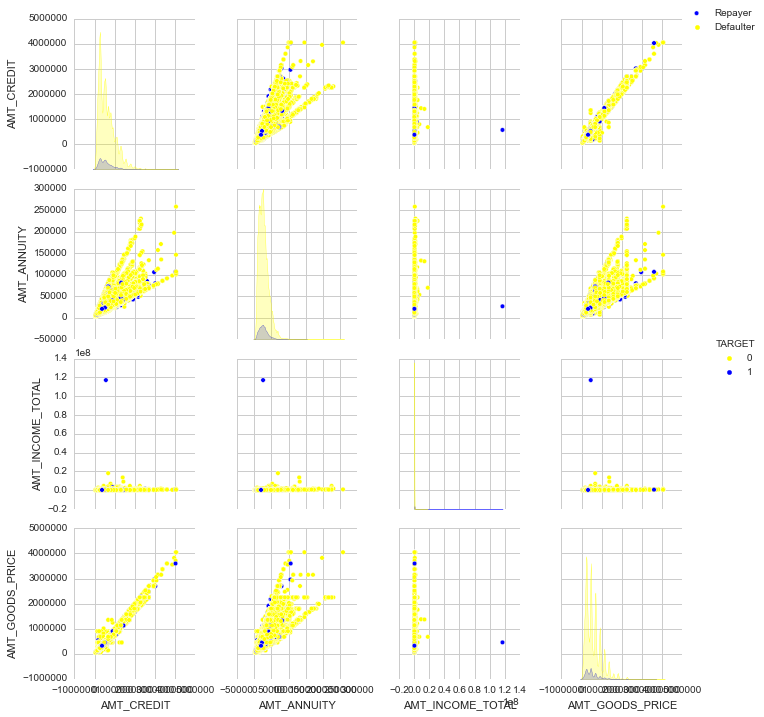

In [640]:
plt.figure(figsize=[40,20])
amount = application_data[[ 'AMT_CREDIT',
                         'AMT_ANNUITY','AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["yellow","blue"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

- We see a linear relationship between Amount Credit and Amount goods price. We could see a straight line in the scatter plot
- That makes sense as if the price of the good is higher they would have applied for higher credit amount


### Merging dataset

In [547]:
combined_dataset=pd.merge(application_data,previous_application, how='inner',on='SK_ID_CURR')

In [548]:
combined_dataset.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE  AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED YEARS_OF_EMPLOYMENT  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION
0      100002       1           Cash loans           M            N               Y             0          202500.0      406597.5        24700.5           351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0    200000-225000     400000-450000   25     20-30               1                 0-5     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                    XAP             Approved             1                    XNA                XAP              New              Vehicles            POS               XNA                    Stone               500       Auto technology         24.0       low_normal      POS other with interest
1      100003       0           Cash loans           F            N               N             0          270000.0     1293502.5        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    250000-275000  900000 and above   45     40-50               3                 0-5     1810518           Cash loans      98356.995         900000.0 

In [549]:
combined_dataset.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR           AGE  YEARS_EMPLOYED    SK_ID_PREV  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  SELLERPLACE_AREA   CNT_PAYMENT
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06  1.413701e+06   1.413701e+06       1.413701e+06                1.413701e+06  1.413701e+06   1.413701e+06       1.413701e+06     1.413701e+06     1.413701e+06             1.413701e+06                1.413701e+06              1.413701e+06              1.413701e+06              1.413701e+06              1.413701e+06            1.413701e+06                1.413701e+06               1.413701e+06                1.413701e+06               1.413701e+06               1.413701e+06                1.413701e+06  1.413701e+06    1.413701e+06  1.413701e+06   1.413701e+06     1.413701e+06  1.413700e+06       1.413701e+06      1.413701e+06  1.413701e+06
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+05  5.875537e+05   2.701688e+04       5.276522e+05                2.074985e-02  1.632105e+04   7.266347e+04       5.003233e+03     3.034563e+03     2.150501e+00             1.198433e+01                1.207327e-02              1.540740e+00              1.537008e-01              1.522906e+00              1.078021e-01           -1.084701e+03                5.484894e-03               6.028149e-03                3.410198e-02               2.664913e-01               3.196935e-01                2.691239e+00  4.421384e+01    1.985500e+02  1.922744e+06   1.484032e+04     1.752436e+05  1.963541e+05       2.006552e+05      3.149878e+02  1.256367e+01
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+05  3.849173e+05   1.395072e+04       3.531028e+05                1.334702e-02  4.344557e+03   1.433374e+05       3.551051e+03     1.507376e+03     9.006787e-01             3.232181e+00                1.092132e-01              2.528944e+00              4.654353e-01              2.507192e+00              3.786711e-01            7.999369e+02                7.702591e-02               1.001966e-01                2.012902e-01               9.268428e-01               8.781444e-01                2.157176e+00  1.190217e+01    3.926378e+02  5.327153e+05   1.316370e+04     2.936222e+05  3.194813e+05       2.820189e+05      7.695082e+03  1.448807e+01
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04  4.500000e+04   1.615500e+03       4.050000e+04                2.900000e-04  7.489000e+03   0.000000e+00       0.000000e+00     0.000000e+00     1.000000e+00             0.000000e+00                0.000000e+00              0.000000e+00              0.000000e+00              0.000000e+00              0.000000e+00           -4.292000e+03                0.000000e+00               0.000000e+00                0.000000e+00               0.000000e+00               0.000000e+00                0.000000e+00  2.000000e+01    0.000000e+00  1.000001e+06   0.000000e+00     0.000000e+00  0.000000e+00       0.000000e+00     -1.000000e+00  0.000000e+00
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+05  2.700000e+05   1.682100e+04       2.385000e+05                1.003200e-02  1.273900e+04   1.042000e+03       2.001000e+03     1.783000e+03     2.000000e+00             1.000000e+01                0.000000e+00              0.000000e+00              0.000000e+00              0.000000e+00              0.000000e+00           -1.683000e+03                0.000000e+00               0.00000

In [550]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 72 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413701 non-null  float64 
 10  AMT_GOODS_PRICE_x            1413701 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

### Dividing the dataset into two dataframe Defaulter and RePayer as done before

In [551]:
RePayer= combined_dataset[combined_dataset['TARGET']==0]
Defaulter=combined_dataset[combined_dataset['TARGET']==1]

In [552]:
RePayer.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE  AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED YEARS_OF_EMPLOYMENT  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION
1      100003       0           Cash loans           F            N               N             0          270000.0     1293502.5        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    250000-275000  900000 and above   45     40-50               3                 0-5     1810518           Cash loans      98356.995         900000.0     1035882.0           900000.0                    XNA             Approved             2                    XNA                XAP         Repeater                   XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0       low_normal             Cash X-Sell: low
2      100003       0           Cash loans           F            N               N             0          270000.0     1293502.5        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0    250000-275000  900000 and above   45     40-50               3                 0-5     2636178       Consumer loans      64567.665         337500.0 

In [553]:
Defaulter.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE  AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED YEARS_OF_EMPLOYMENT  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE       NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
0        100002       1           Cash loans           M            N               Y             0          202500.0      406597.5        24700.5           351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0    200000-225000     400000-450000   25     20-30               1                 0-5     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                    XAP             Approved             1                    XNA                XAP              New                  Vehicles            POS               XNA                    Stone               500      Auto technology         24.0       low_normal   POS other with interest
161      100047       1           Cash loans           M            N               Y             0          202500.0     1193580.0        35028.0           855000.0   Unaccompanied  Commercial associate  Secondary / secondary special               Married  House / apartment                    0.025164       17482           1262             1182.0             1029        Laborers              2.0                    2                           2                    TUESDAY                        9                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       0.0                       0.0                       0.0                       0.0                 -1075.0                         0.0                        0.0                         0.0                        2.0                        0.0                         4.0    200000-225000  900000 and above   47     40-50               3                 0-5     1472630      Revolving loans      22500.00

In [555]:
RePayer.shape

(1291341, 72)

In [556]:
Defaulter.shape

(122360, 72)

#### We need to analyze the NAME_CONTRACT_STATUS with respect to different parameter over the chart for both Defaulter and Repayer

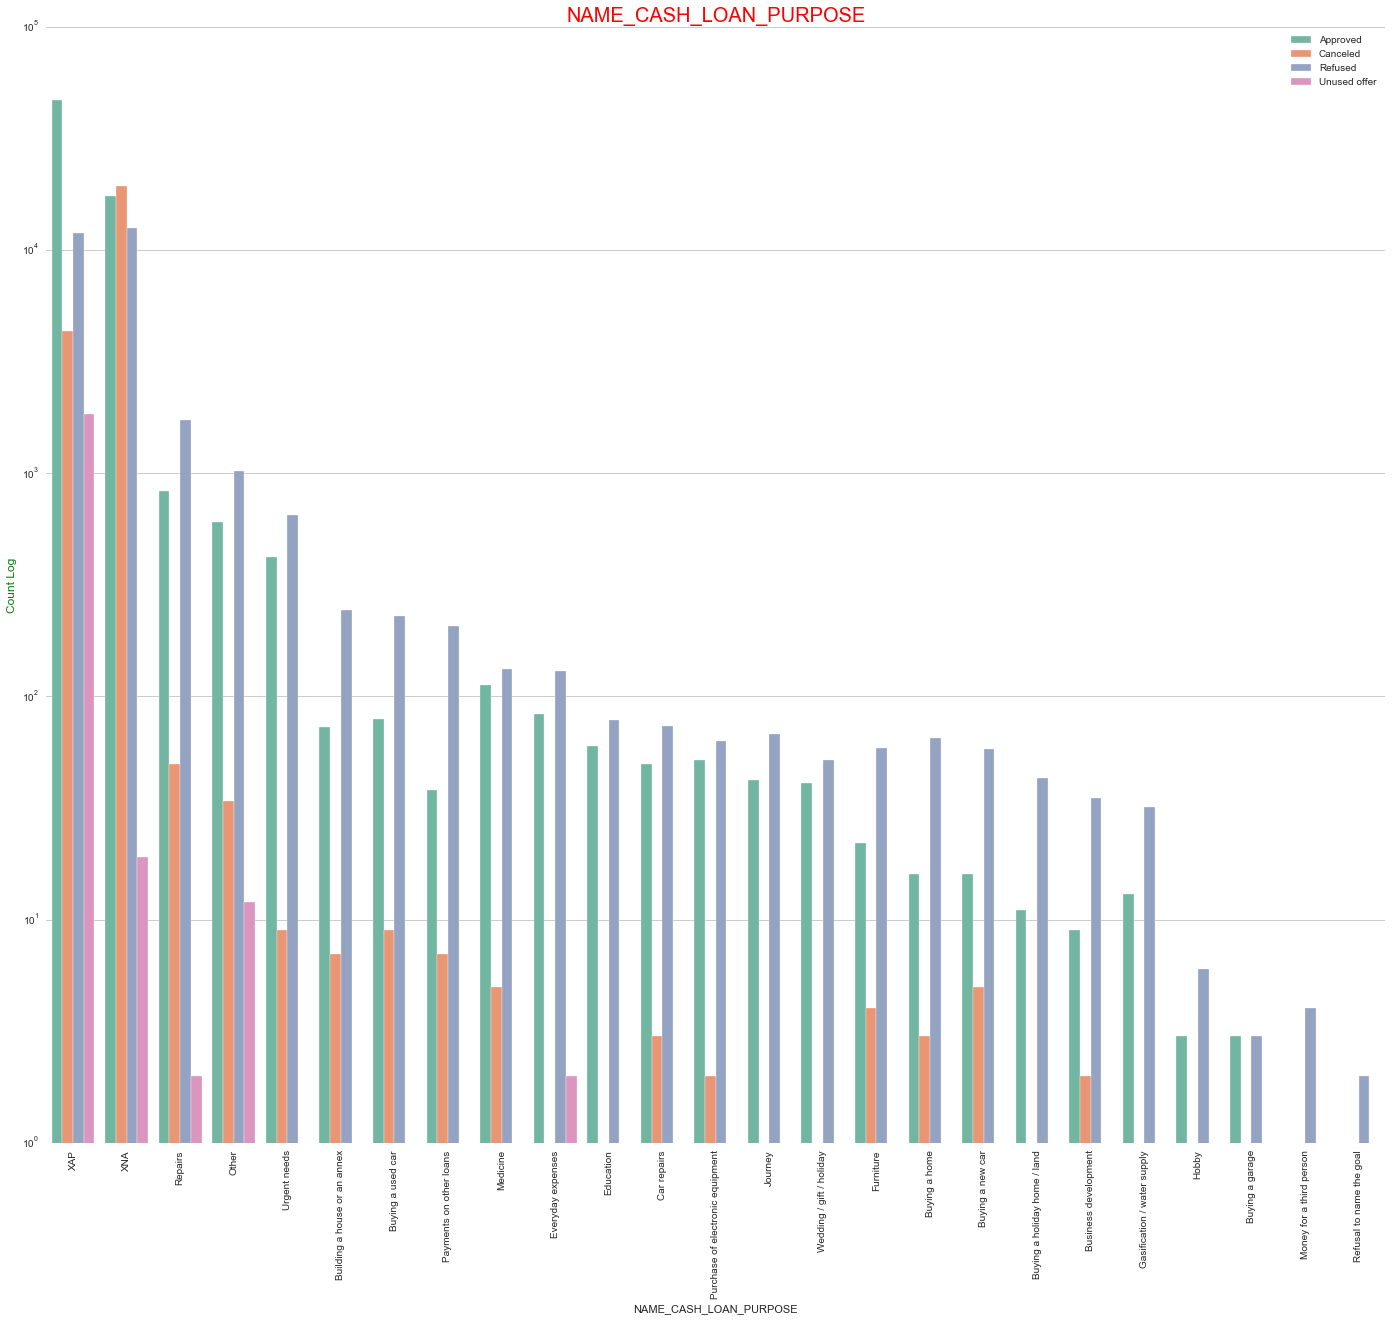

In [582]:
# checking for Defaulter
plt.figure(figsize=[24,20])
ax=sns.countplot(data=Defaulter,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',order=Defaulter['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.yscale('log')
plt.ylabel('Count Log',fontdict={'fontsize':12,'color':'green'})
plt.title('NAME_CASH_LOAN_PURPOSE',fontdict={'fontsize':20,'color':'red'})
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

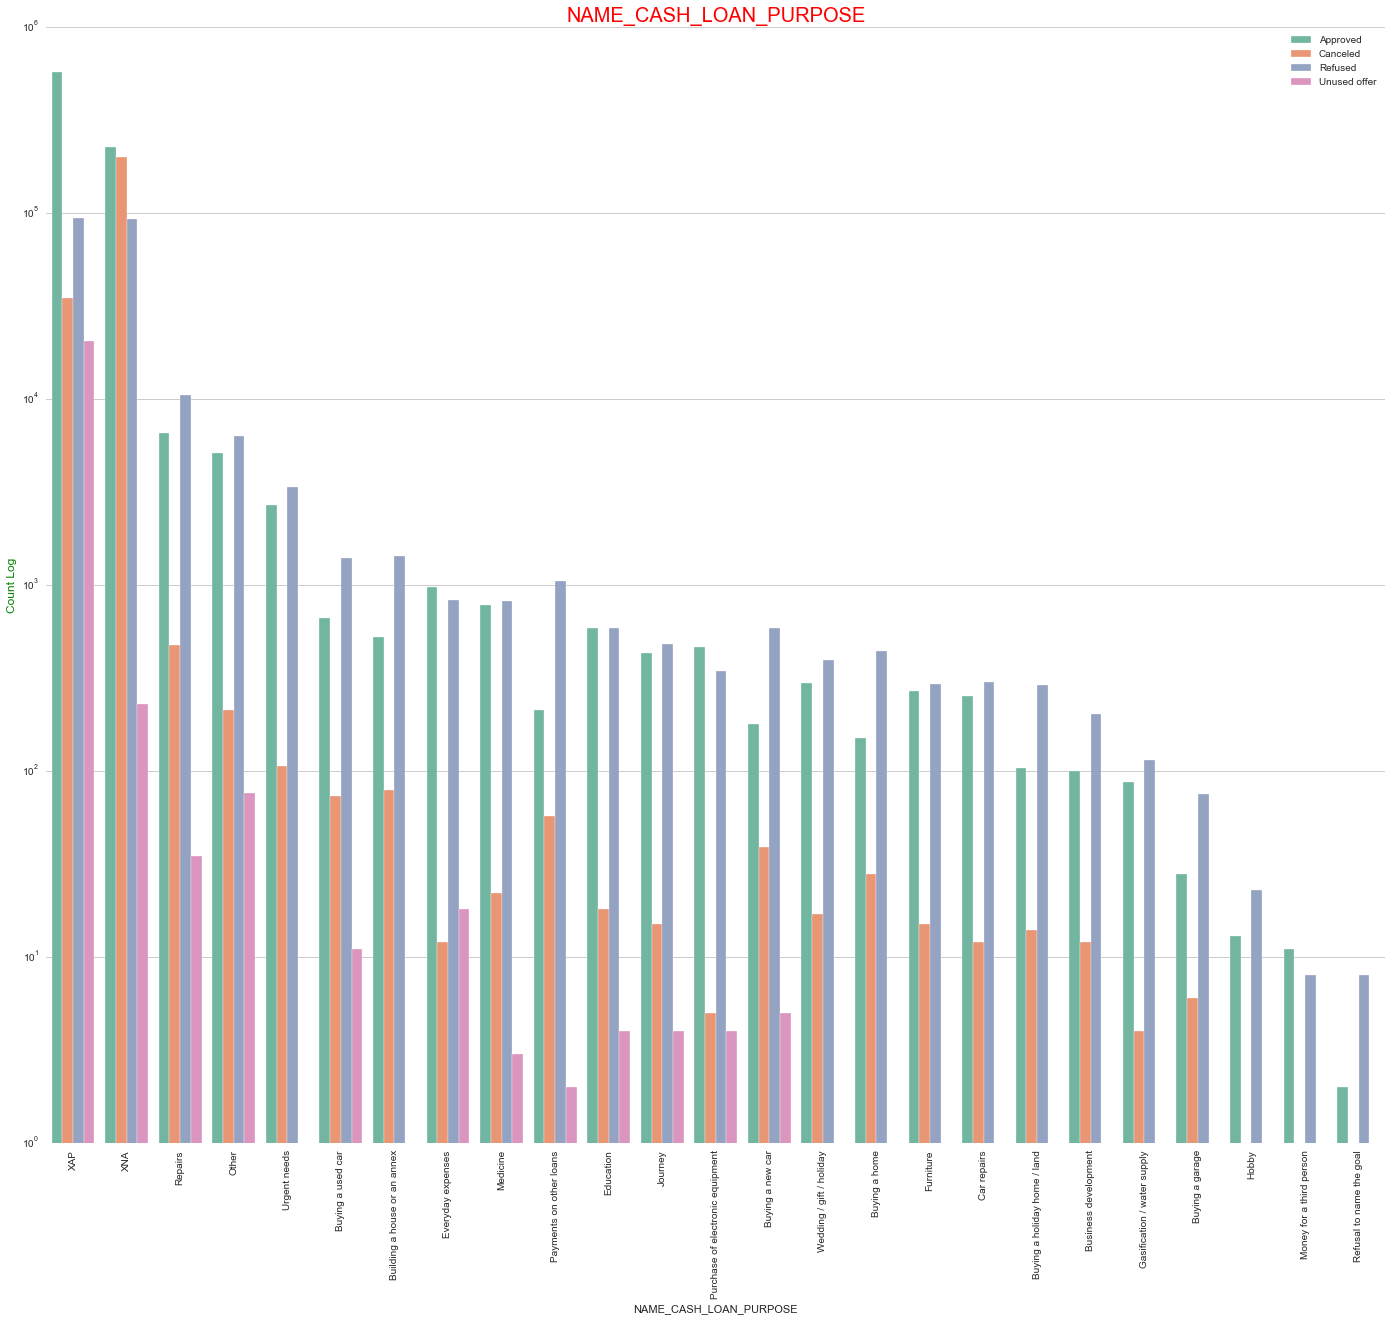

In [583]:
# checking with Repayer data
plt.figure(figsize=[24,20])
ax1=sns.countplot(data=RePayer,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',order=RePayer['NAME_CASH_LOAN_PURPOSE'].value_counts().index)

plt.yscale('log')
plt.ylabel('Count Log',fontdict={'fontsize':12,'color':'green'})
plt.title('NAME_CASH_LOAN_PURPOSE',fontdict={'fontsize':20,'color':'red'})
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

From the above two charts we could analyze the following
- For most of the applicants the loan purpose is unknown (XAP, XNA)
- Among the unknown purpose we could see a lot of applications has been approved and tends to be defaulter. Hence this gap is needed to be filled
- A lot of  applications has been cancelled from bank with purpose Repairs,Others,Urgent Meds but they have high rate of defaults as well , that means these categories are found risky to banks and they offer high interest rate and does the applicants refused the loan.

Lets check between our TARGET variable and NAME_CONTRACT_STATUS

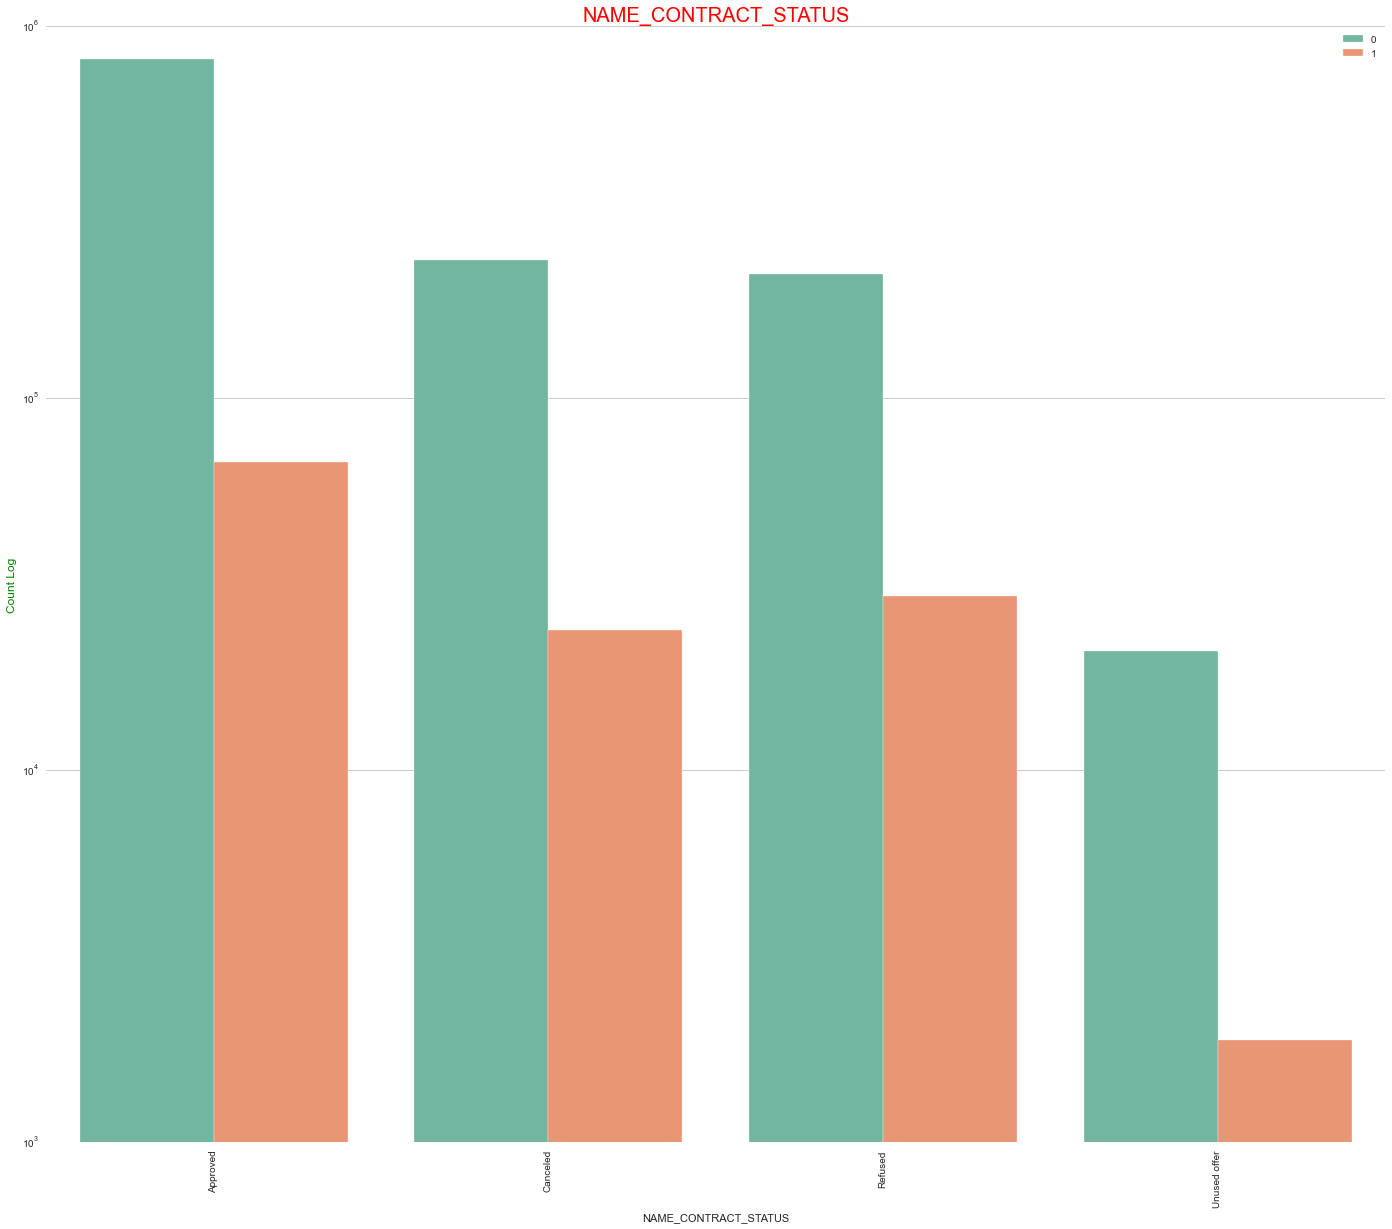

In [584]:
plt.figure(figsize=[24,20])
output=sns.countplot(data=combined_dataset,x='NAME_CONTRACT_STATUS',hue='TARGET',order=RePayer['NAME_CONTRACT_STATUS'].value_counts().index)

plt.yscale('log')
plt.ylabel('Count Log',fontdict={'fontsize':12,'color':'green'})
plt.title('NAME_CONTRACT_STATUS',fontdict={'fontsize':20,'color':'red'})
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

We could see a lot of applications has been refused or cancelled for the applicants who have repaid their loan

In [588]:
# checking name_contract_status if it was business loss or financial loss
data=combined_dataset.groupby("NAME_CONTRACT_STATUS")["TARGET"]
loss_analysis=pd.concat([data.value_counts(),round(data.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
loss_analysis

Counts  Percentage
NAME_CONTRACT_STATUS TARGET                    
Approved             0       818856       92.41
                     1        67243        7.59
Canceled             0       235641       90.83
                     1        23800        9.17
Refused              0       215952       88.00
                     1        29438       12.00
Unused offer         0        20892       91.75
                     1         1879        8.25

Above table is the most important analysis which tells us
- From the approved applications 92% of the applicants have repaied their loan
- But we could also see their are 90% of the applications that were Cancelled in previous loan which have repaid the loan in the current application. That is business loss
- We see that we have 8% financial loss where we approved the application but the applicant was defaulter
- Also we see 88% of the applications that were Refused in previous loan have repaid the loan in current application, that means the interest might have been provided at higher rate due to which the applicant might have refused the loan. This is also business loss.

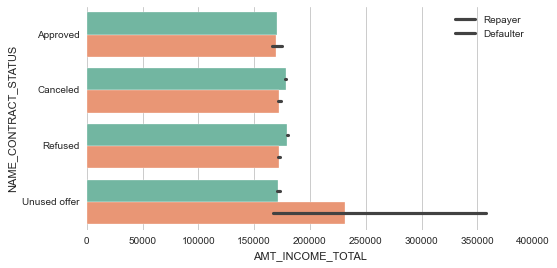

In [593]:
# Lets check with respect to the income they get
plt.figure(figsize=(8,4))
sns.barplot(x='AMT_INCOME_TOTAL',y='NAME_CONTRACT_STATUS',  hue="TARGET",  data=combined_dataset)
plt.legend(['Repayer','Defaulter'])
plt.show()

We could see that the people with higher income than others with unused application previously have default this time

## CONCLUSION

After analyzing the complete dataset I could conclude the below points as per my understanding of banking data.

  Data Imbalance
- Repayer - 91.93%  and Defaulter - 8.07%
- Ratios of imbalance is 11.39 : 1

#### Regarding Defaulters

- CODE_GENDER: Men are at relatively higher default rate as compare to female
- NAME_EDUCATION _TYPE: Lower Secondary has the highest Defaulter percentage
- NAME_INCOME_TYPE: Maternity leave and Unemployed are the one with maximum percentage of defaulter with 30-40% of defaulter even though the count of the application with those type is not large.
- CNT_CHILDREN & & CNT_FAM_MEMBERS:Applicants more than 9 children has high % of being a defaulter with less applications hence there application needs to be rejected.
- NAME_HOUSING_TYPE: Most defaulter lies under the category of Rented Apartment followed by Living with Parents
- ORGANIZATION_TYPE: The Organization with most default are Transport Type 3, Industry Type 13, 8 Resturant,Construction
- OCCUPATION_TYPE: The occupation with most Default % is Low-skill Labourers followed by Drivers and Waiters/bartmen staff
- DAYS_BIRTH: People among the age group from 20-40 have high % of being a defaulter
- DAYS_EMPLOYED: Most of the applications are from the year of experience 0-5 group but this has highest percentage of being a defaulter.
- REGION_RATING: Applicants with 3 as Region Rating are more likely to be defaulter
- NAME_FAMILY_STATUS: People with civil marriage or single are tends to be default
- AMT_INCOME_TOTAL: Maximumn applicants who are likely to a defaulter have income ranges from 100k -225K
- AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.

#### Regarding Repayers

- NAME_EDUCATION _TYPE: Academic degree has less percentage of defaults
- NAME_INCOME_TYPE: Businessman and Student are the safest to repay the loan
- CNT_CHILDREN: Most applicants dont have children or just have 1 child , and also have higher chances of repaying the loan
- NAME_HOUSING_TYPE: Most of the applicants have House/Apartment and comparatively less defaulter %
- ORGANIZATION_TYPE: The Organization with less defaults are Transport Type 1, Industry Type 12, Trade Type 4
- DAYS_BIRTH: People among the age group above 50 are the safest
- DAYS_EMPLOYED: People with more years of experience have less percentage of being a defaulter, safest is 40-50 years of experience
- REGION_RATING: Rating 1 is less prone to being a defaulter
- NAME_FAMILY_STATUS: People who are married or window tends to repay the loan
- AMT_INCOME_TOTAL: People with more income are tends to be Repayer. Income of Businessman is highest and negligible defaulter records, we could see the same graph for Student
- NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.

#### Regarding Refused applications

- A lot of applications has been cancelled and refused from bank with purpose Repairs,Others,Urgent Meds but they have high rate of defaults as well , that means these categories are found risky to banks and been offered high interest rate and does the applicants refused the loan.
- We could see a lot of applications has been refused or cancelled for the applicants who have repaid their loan in the current application.

#### Business and Financial Loss

- From the approved applications 92% of the applicants have repaied their loan.
- But we could also see their are 90% of the applications that were Cancelled in previous loan which have repaid the loan in the current application. That is business loss. Hence it would be good if we could document the reason for cancelling the application so that the terms can be negogiated and can build business opportunities.
- We see that we have 8% financial loss where we approved the application but the applicant was defaulter.
- Also we see 88% of the applications that were Refused in previous loan have repaid the loan in current application, that means the interest might have been provided at higher rate due to which the applicant might have refused the loan. This is also business loss. Hence documenting the refused reason could help negogiate as well to mitigate business loss.
- Among the unknown purpose we could see a lot of applications has been approved and tends to be defaulter. Hence this gap is needed to be filled, where purpose could be documented and then the trend could be analyzed

## THANK YOU